In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import feature_engine as fe
import category_encoders as ce
import seaborn as sns


# Load Dataset

In [39]:
data = pd.read_excel('./ds/ds.xlsx', sheet_name='Dataset')
col_to_remove = ['Ptid', ]
data = data.drop(col_to_remove, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Persistency_Flag                                                    3424 non-null   object
 1   Gender                                                              3424 non-null   object
 2   Race                                                                3424 non-null   object
 3   Ethnicity                                                           3424 non-null   object
 4   Region                                                              3424 non-null   object
 5   Age_Bucket                                                          3424 non-null   object
 6   Ntm_Speciality                                                      3424 non-null   object
 7   Ntm_Specialist_Flag     

In [40]:
obejct_cols = data.select_dtypes(include='object').columns[1:]
int_cols = data.select_dtypes(include='int64').columns

# Describing Data

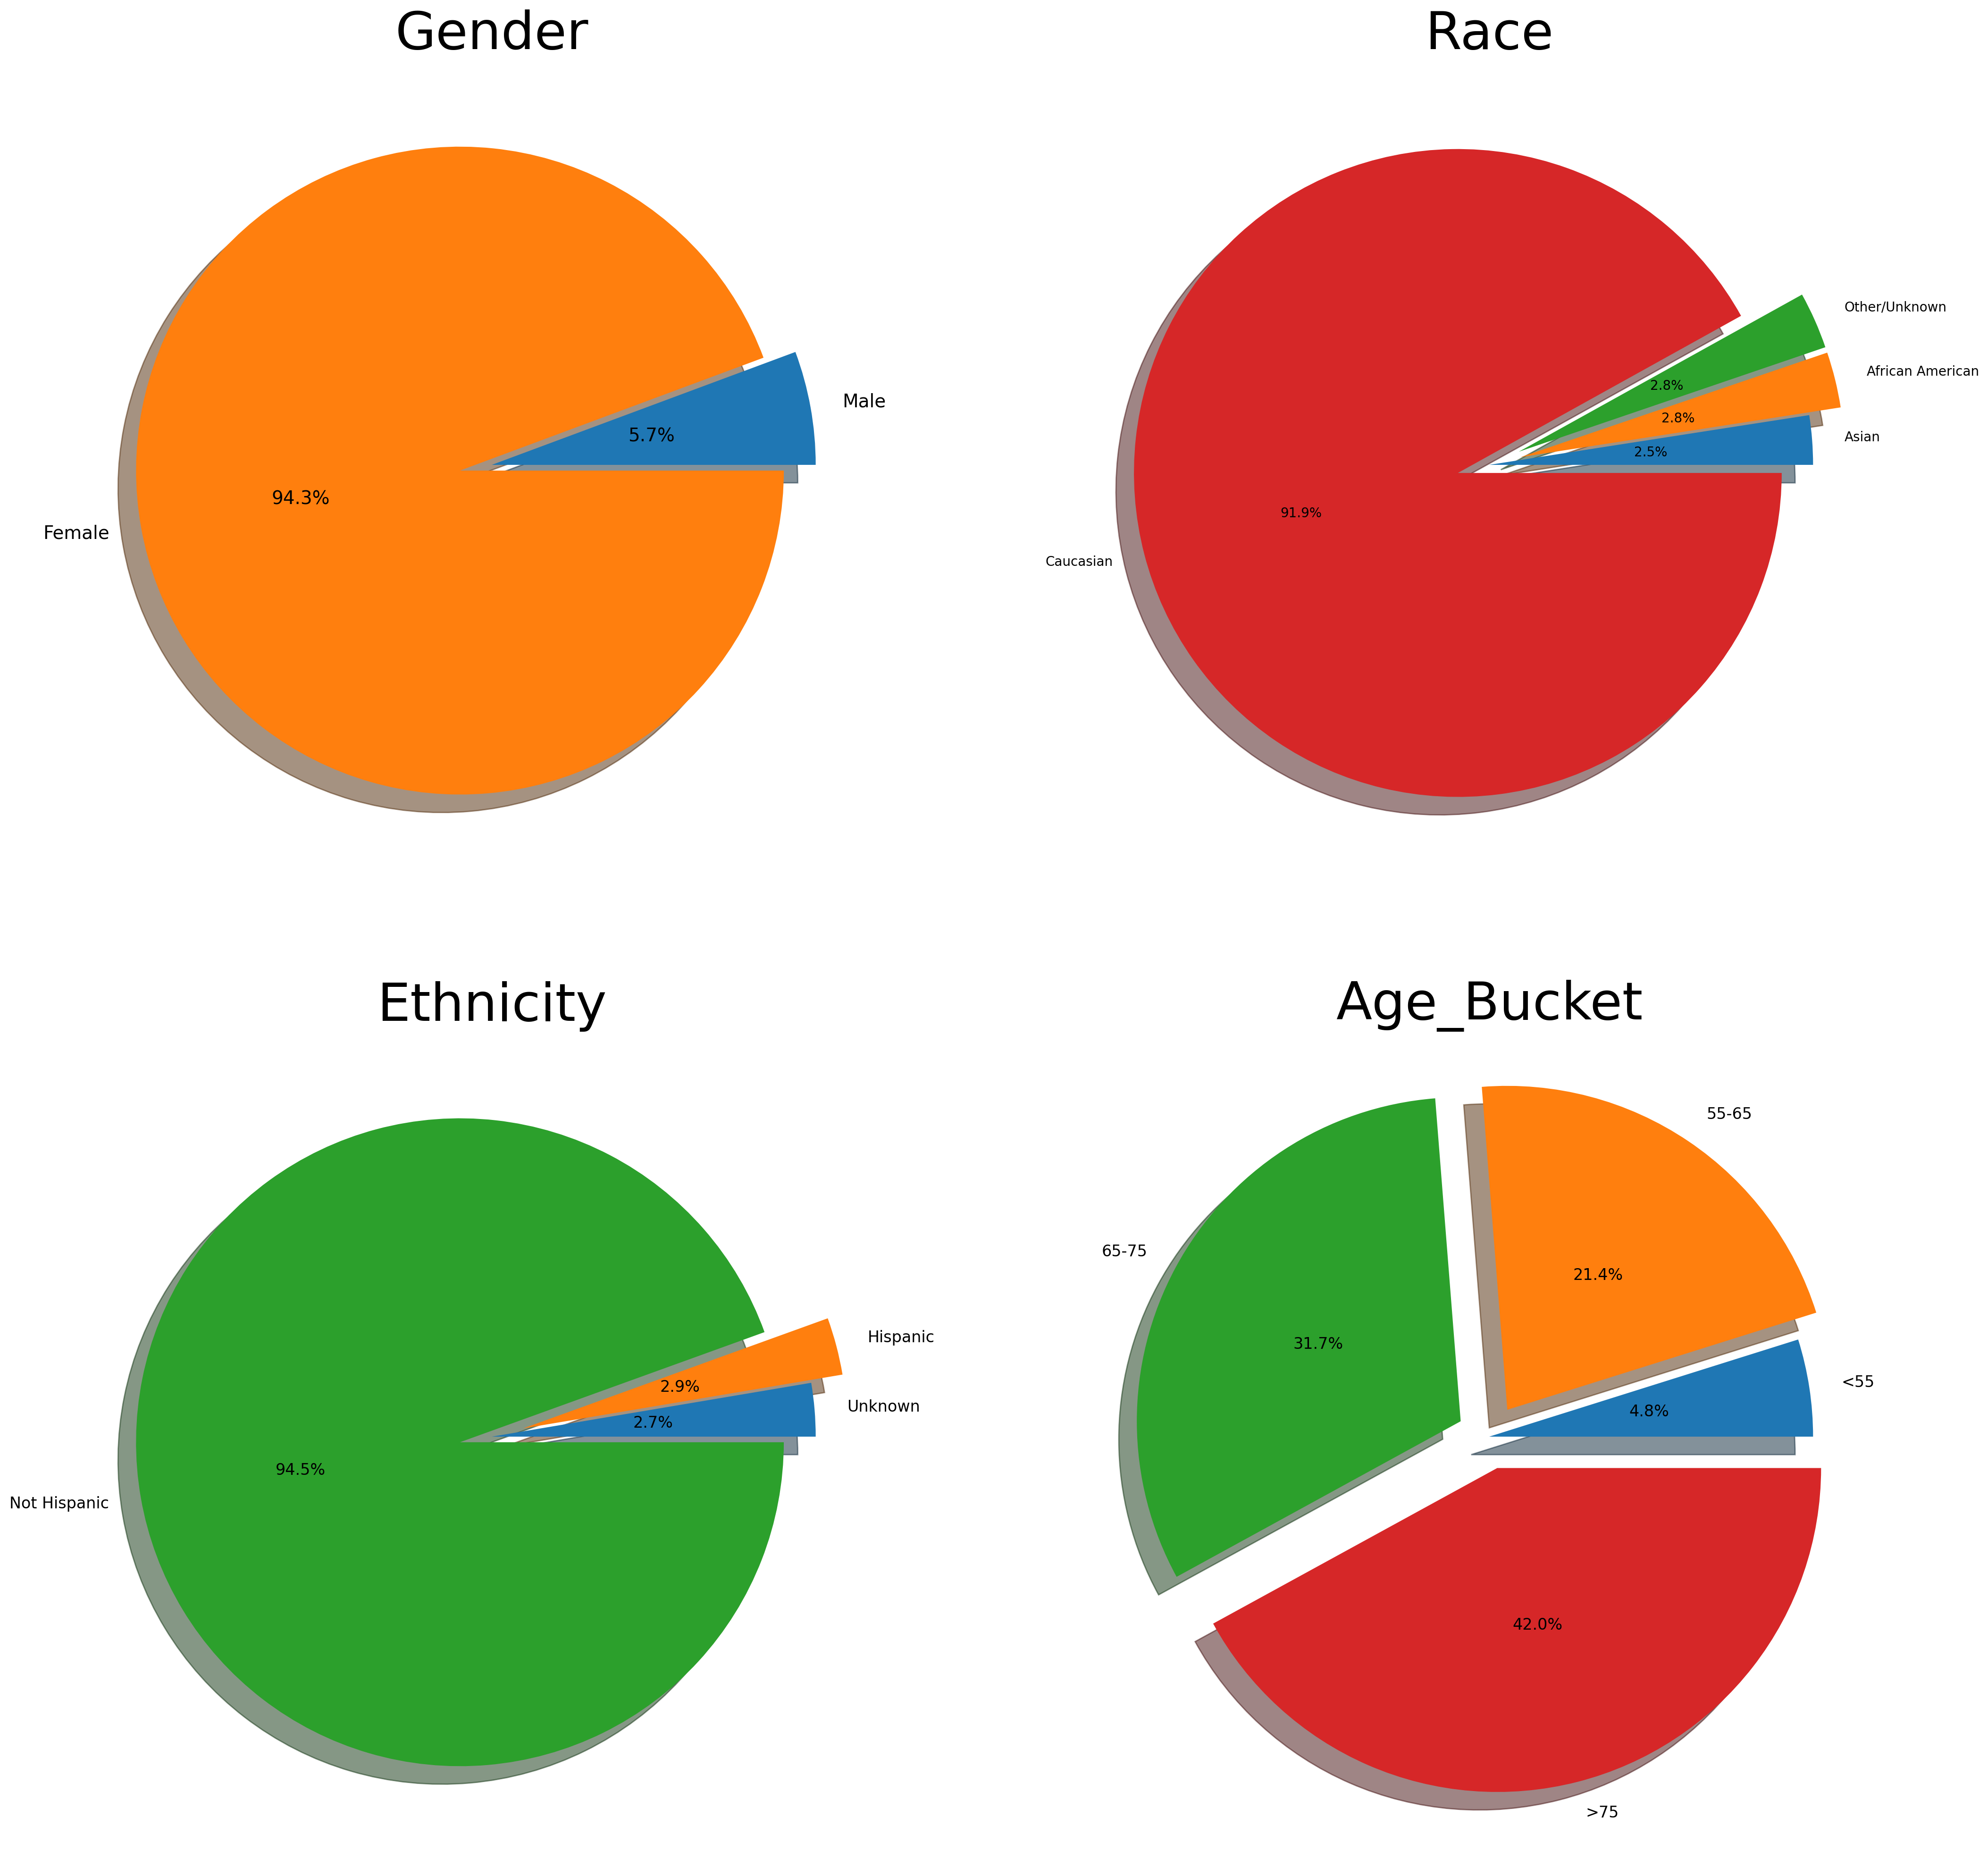

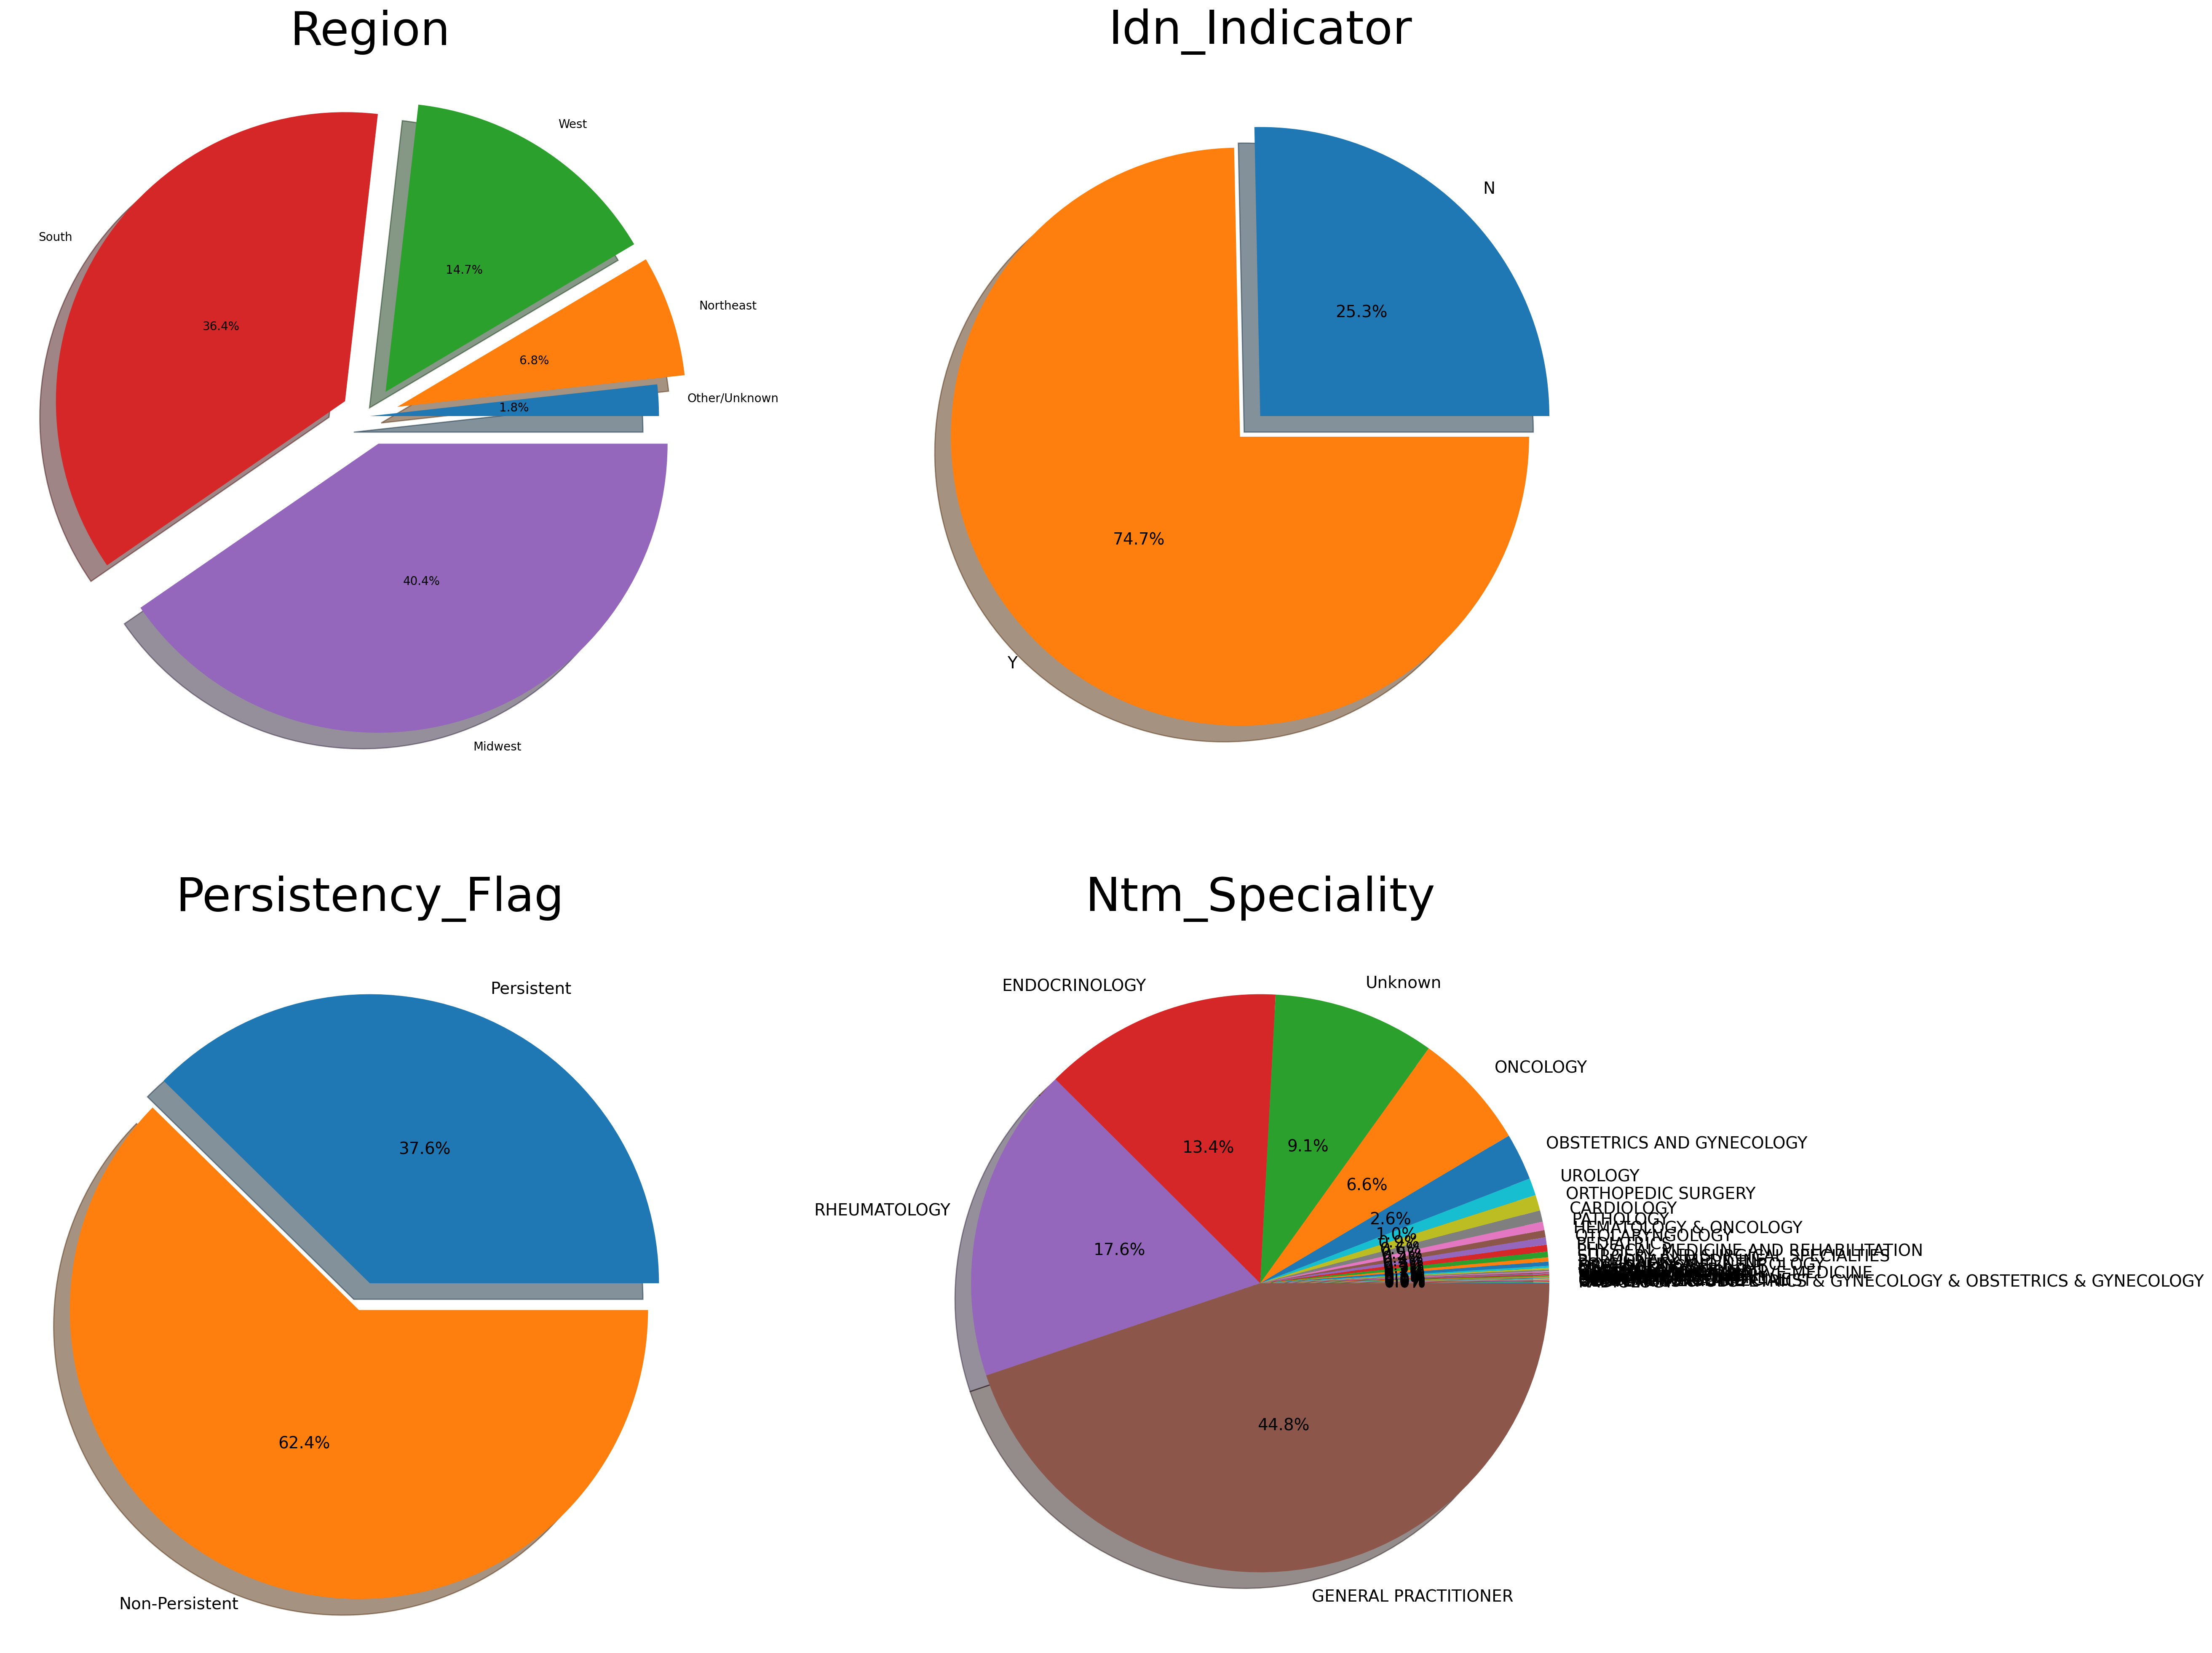

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(25,25), dpi=200)


var = data['Gender'].value_counts(ascending=True)
labels = var.index
explode = (0, 0.1)
axes[0,0].pie(x=var, autopct="%.1f%%", labels=labels, explode=explode, pctdistance=0.5, shadow=True, textprops={'fontsize': 14})
axes[0,0].set_title('Gender', fontsize=40)


var = data['Race'].value_counts(ascending=True)
labels = var.index
explode = (0, 0.1, 0.1, 0.1)
axes[0,1].pie(x=var, autopct="%.1f%%", labels=labels, explode=explode, pctdistance=0.5, shadow=True, textprops={'fontsize': 10})
axes[0,1].set_title('Race', fontsize=40)


var = data['Ethnicity'].value_counts(ascending=True)
labels = var.index
explode = (0, 0.1, 0.1)
axes[1,0].pie(x=var, autopct="%.1f%%", labels=labels, explode=explode, pctdistance=0.5, shadow=True, textprops={'fontsize': 12})
axes[1,0].set_title('Ethnicity', fontsize=40)


var = data['Age_Bucket'].value_counts(ascending=True)
labels = var.index
explode = (0, 0.1, 0.1, 0.1)
axes[1,1].pie(x=var, autopct="%.1f%%", labels=labels, explode=explode, pctdistance=0.5, shadow=True, textprops={'fontsize': 12})
axes[1,1].set_title('Age_Bucket', fontsize=40)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(25,25), dpi=200)


var = data['Region'].value_counts(ascending=True)
labels = var.index
explode = (0, 0.1, 0.1, 0.1, 0.1)
axes[0,0].pie(x=var, autopct="%.1f%%", labels=labels, explode=explode, pctdistance=0.5, shadow=True, textprops={'fontsize': 10})
axes[0,0].set_title('Region', fontsize=40)


var = data['Idn_Indicator'].value_counts(ascending=True)
labels = var.index
explode = (0, 0.1)
axes[0,1].pie(x=var, autopct="%.1f%%", labels=labels, explode=explode, pctdistance=0.5, shadow=True, textprops={'fontsize': 14})
axes[0,1].set_title('Idn_Indicator', fontsize=40)



var = data['Persistency_Flag'].value_counts(ascending=True)
labels = var.index
explode = (0, 0.1)
axes[1,0].pie(x=var, autopct="%.1f%%", labels=labels, explode=explode, pctdistance=0.5, shadow=True, textprops={'fontsize': 14})
axes[1,0].set_title('Persistency_Flag', fontsize=40)



var = data['Ntm_Speciality'].value_counts(ascending=True)
labels = var.index
# explode = (0, 0.1)
axes[1,1].pie(x=var, autopct="%.1f%%", labels=labels, pctdistance=0.5, shadow=True, textprops={'fontsize': 14})
axes[1,1].set_title('Ntm_Speciality', fontsize=40)

plt.show()

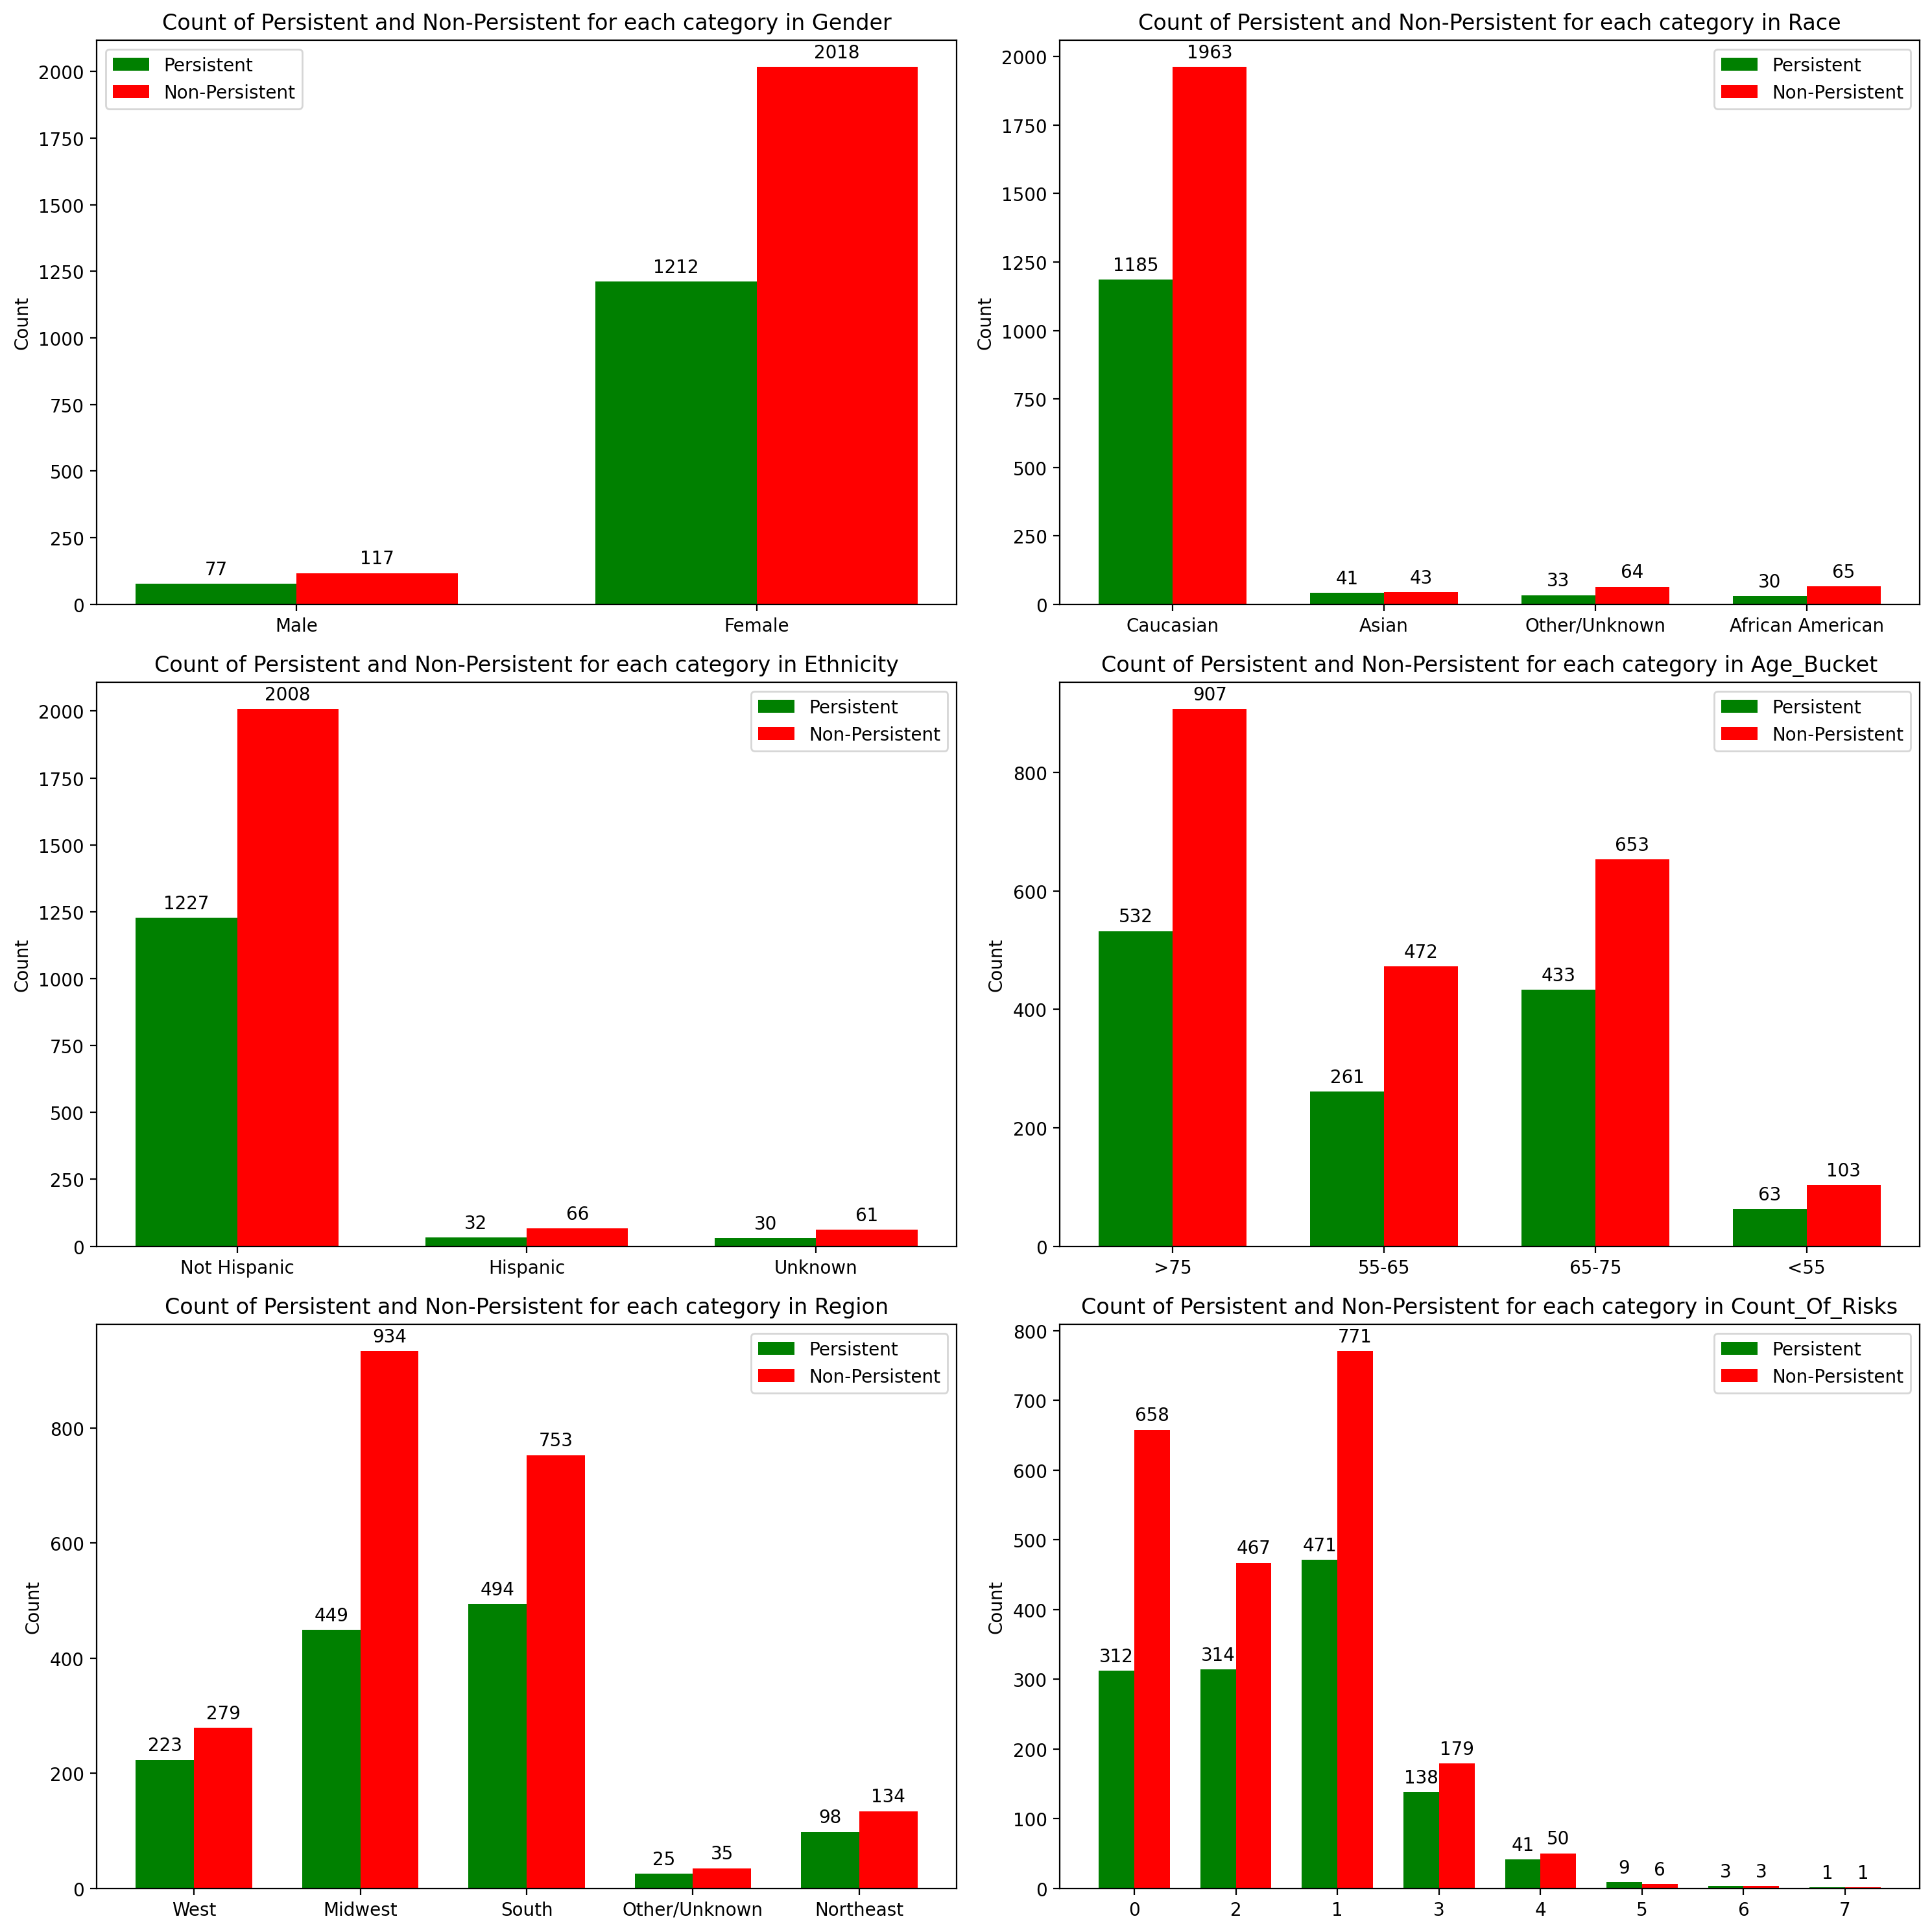

In [42]:
cols = ['Gender', 'Race', 'Ethnicity', 'Age_Bucket', 'Region', 'Count_Of_Risks']

index_decoder = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1), 4: (2,0), 5: (2,1),}
fig, ax = plt.subplots(3,2, figsize=(15, 15), dpi=200)

for index, col in enumerate(cols):
#     var = data[col].value_counts(ascending=True)
    labels = data[col].unique()
    x = np.arange(len(labels))
    p = []
    nonp = []
    width = 0.35 
    i, j = index_decoder[index]
    for l in labels:
        values = data[data[col] == l]['Persistency_Flag'].value_counts(ascending=True)
        p.append(values['Persistent'])
        nonp.append(values['Non-Persistent'])
    rects1 = ax[i,j].bar(x - width/2, p, width, label='Persistent', color='Green')
    rects2 = ax[i,j].bar(x + width/2, nonp, width, label='Non-Persistent', color='red')
    ax[i,j].set_ylabel('Count')
    ax[i,j].set_title('Count of Persistent and Non-Persistent for each category in ' + col)
    ax[i,j].set_xticks(x, labels)
    ax[i,j].legend()
    ax[i,j].bar_label(rects1, padding=3)
    ax[i,j].bar_label(rects2, padding=3)
    fig.tight_layout()
plt.show()

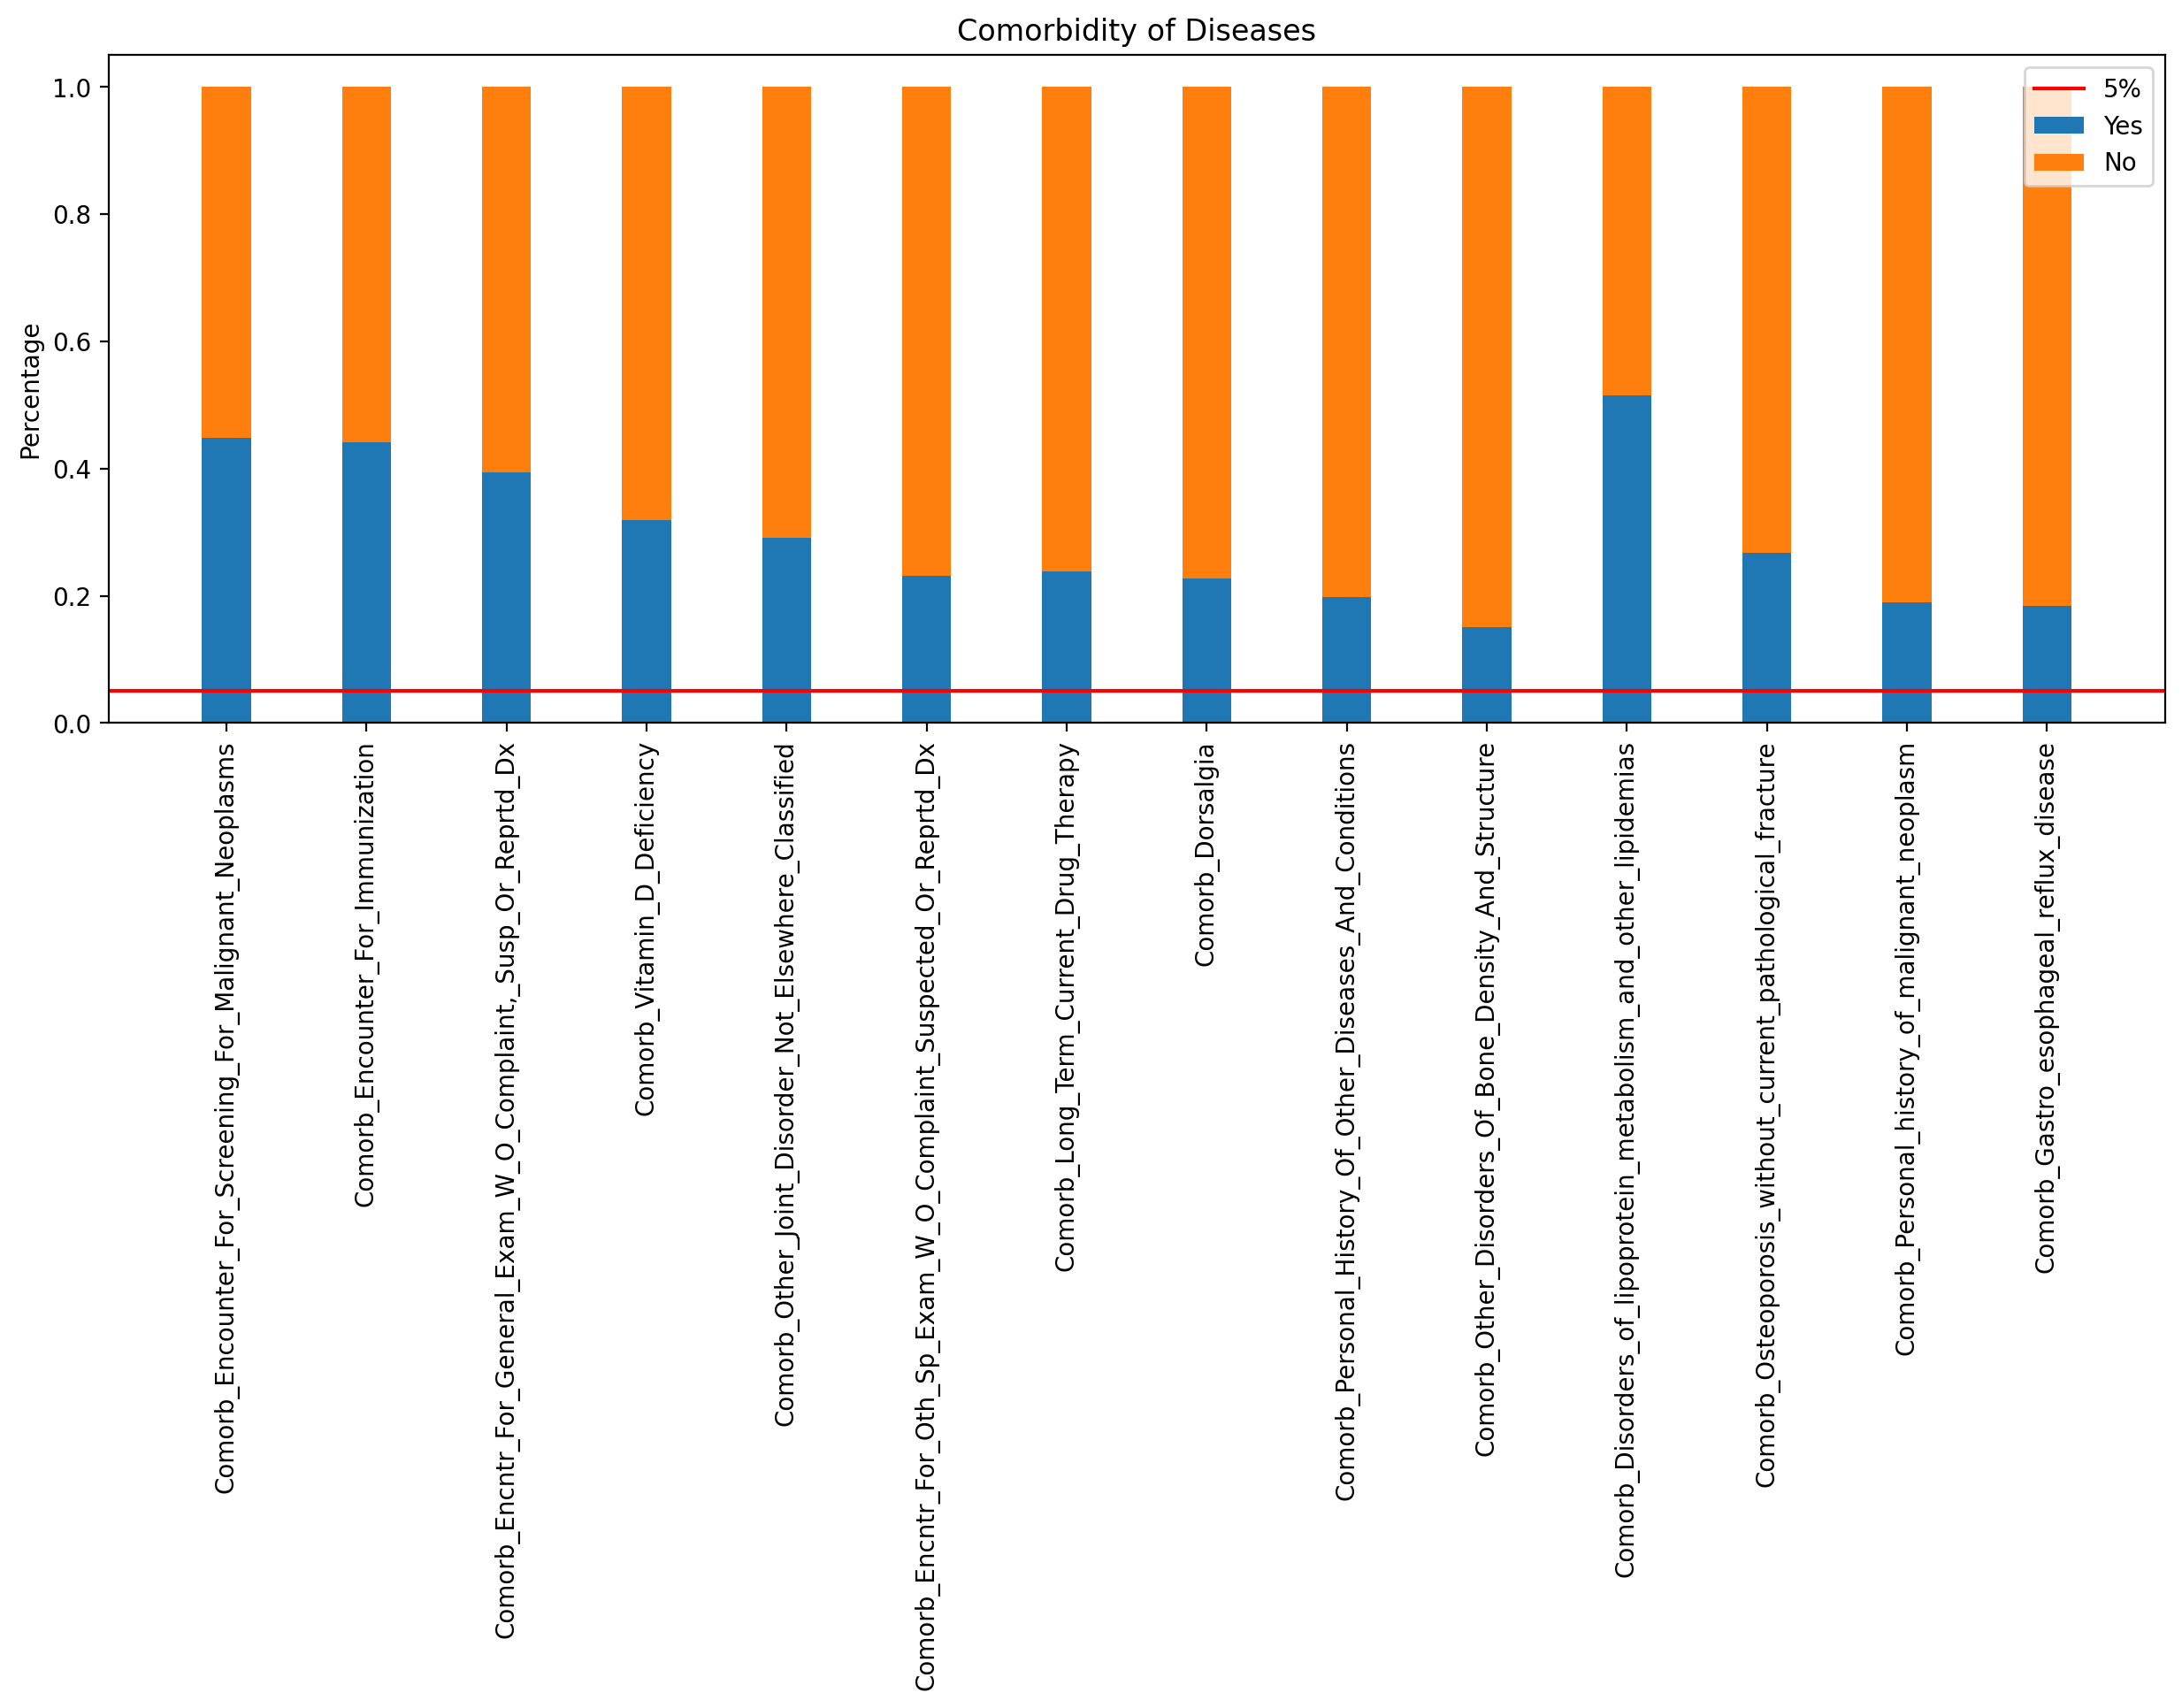

In [43]:
labels = [c for c in data.columns if "Comorb" in c]
yes = []
no = []
width = 0.35 
for l in labels:
    percantages = data[l].value_counts(ascending=True)/ len(data)
    yes.append(percantages['Y'])
    no.append(percantages['N'])

fig, ax = plt.subplots(figsize=(15,5), dpi=200)
ax.bar(labels, yes, width, label='Yes')
ax.bar(labels, no, width, bottom=yes, label='No')
ax.axhline(y=0.05, color='red', label='5%')
ax.set_ylabel('Percentage')
ax.set_title('Comorbidity of Diseases')
ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
plt.show()

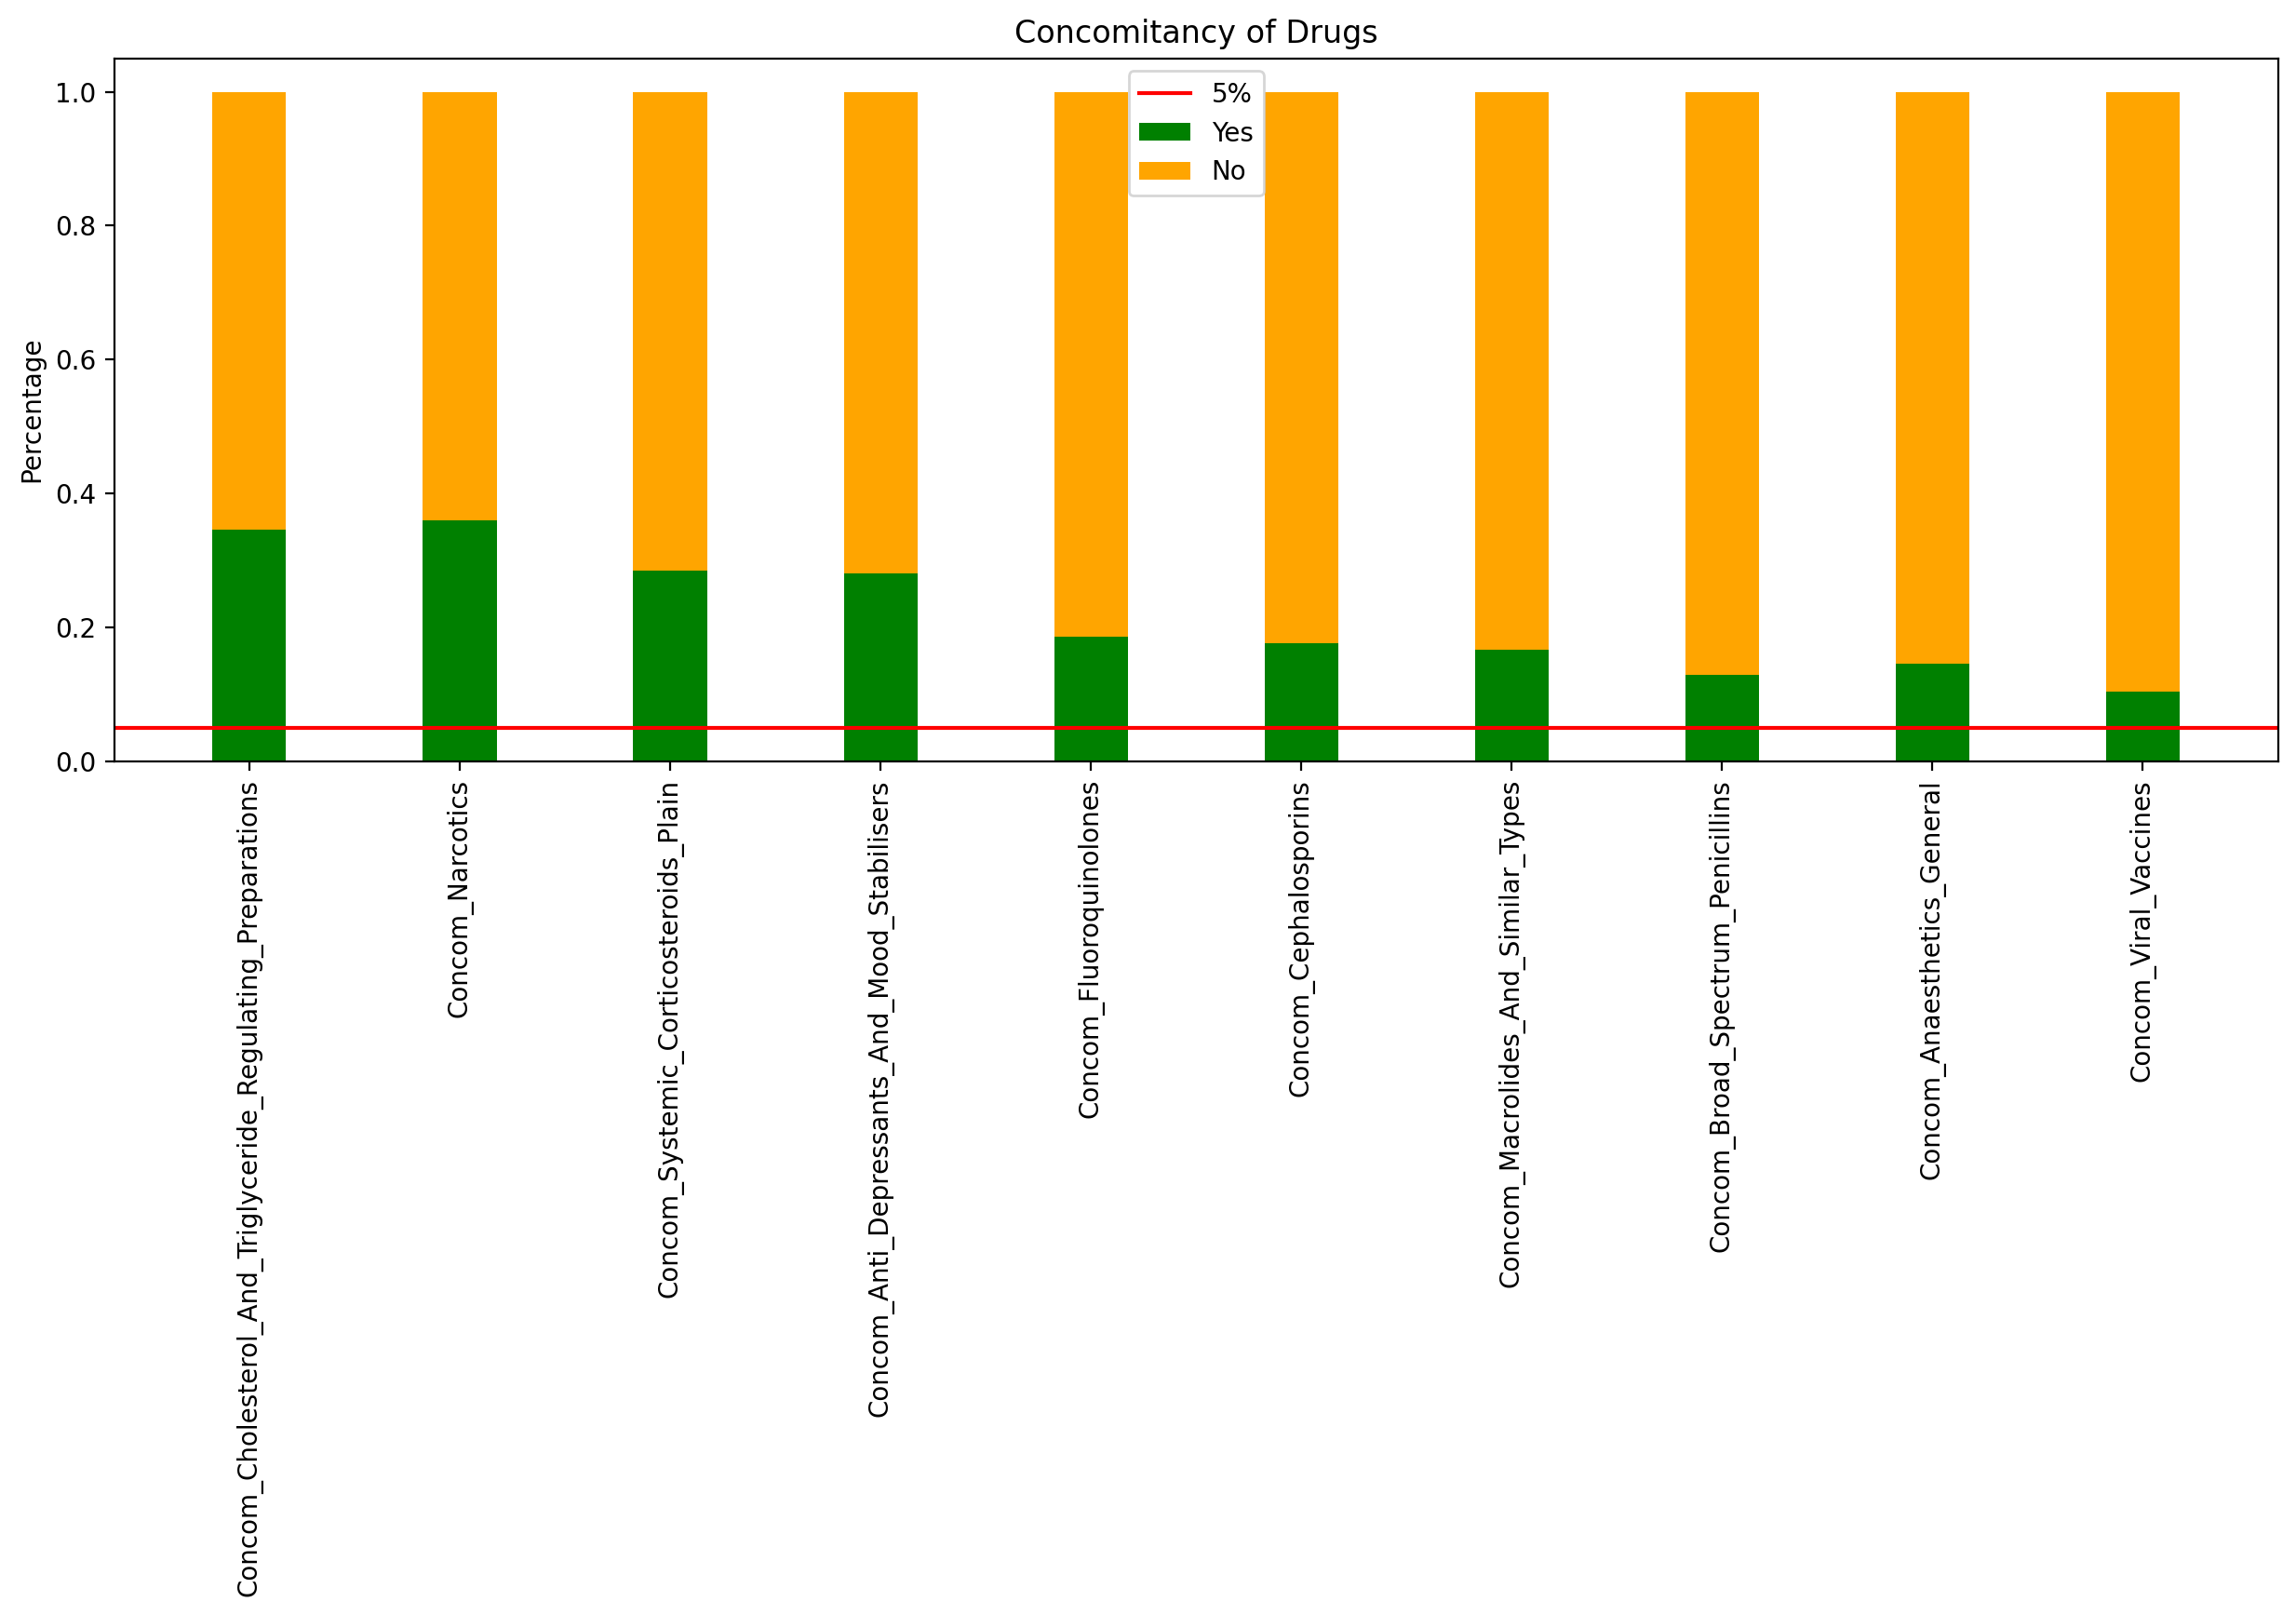

In [44]:
labels = [c for c in data.columns if "Concom" in c]
yes = []
no = []
width = 0.35 
for l in labels:
    percantages = data[l].value_counts(ascending=True)/ len(data)
    yes.append(percantages['Y'])
    no.append(percantages['N'])

fig, ax = plt.subplots(figsize=(15,5), dpi=200)
ax.bar(labels, yes, width, label='Yes', color='green')
ax.bar(labels, no, width, bottom=yes, label='No', color='orange')
ax.axhline(y=0.05, color='red', label='5%')
ax.set_ylabel('Percentage')
ax.set_title('Concomitancy of Drugs')
ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
plt.show()

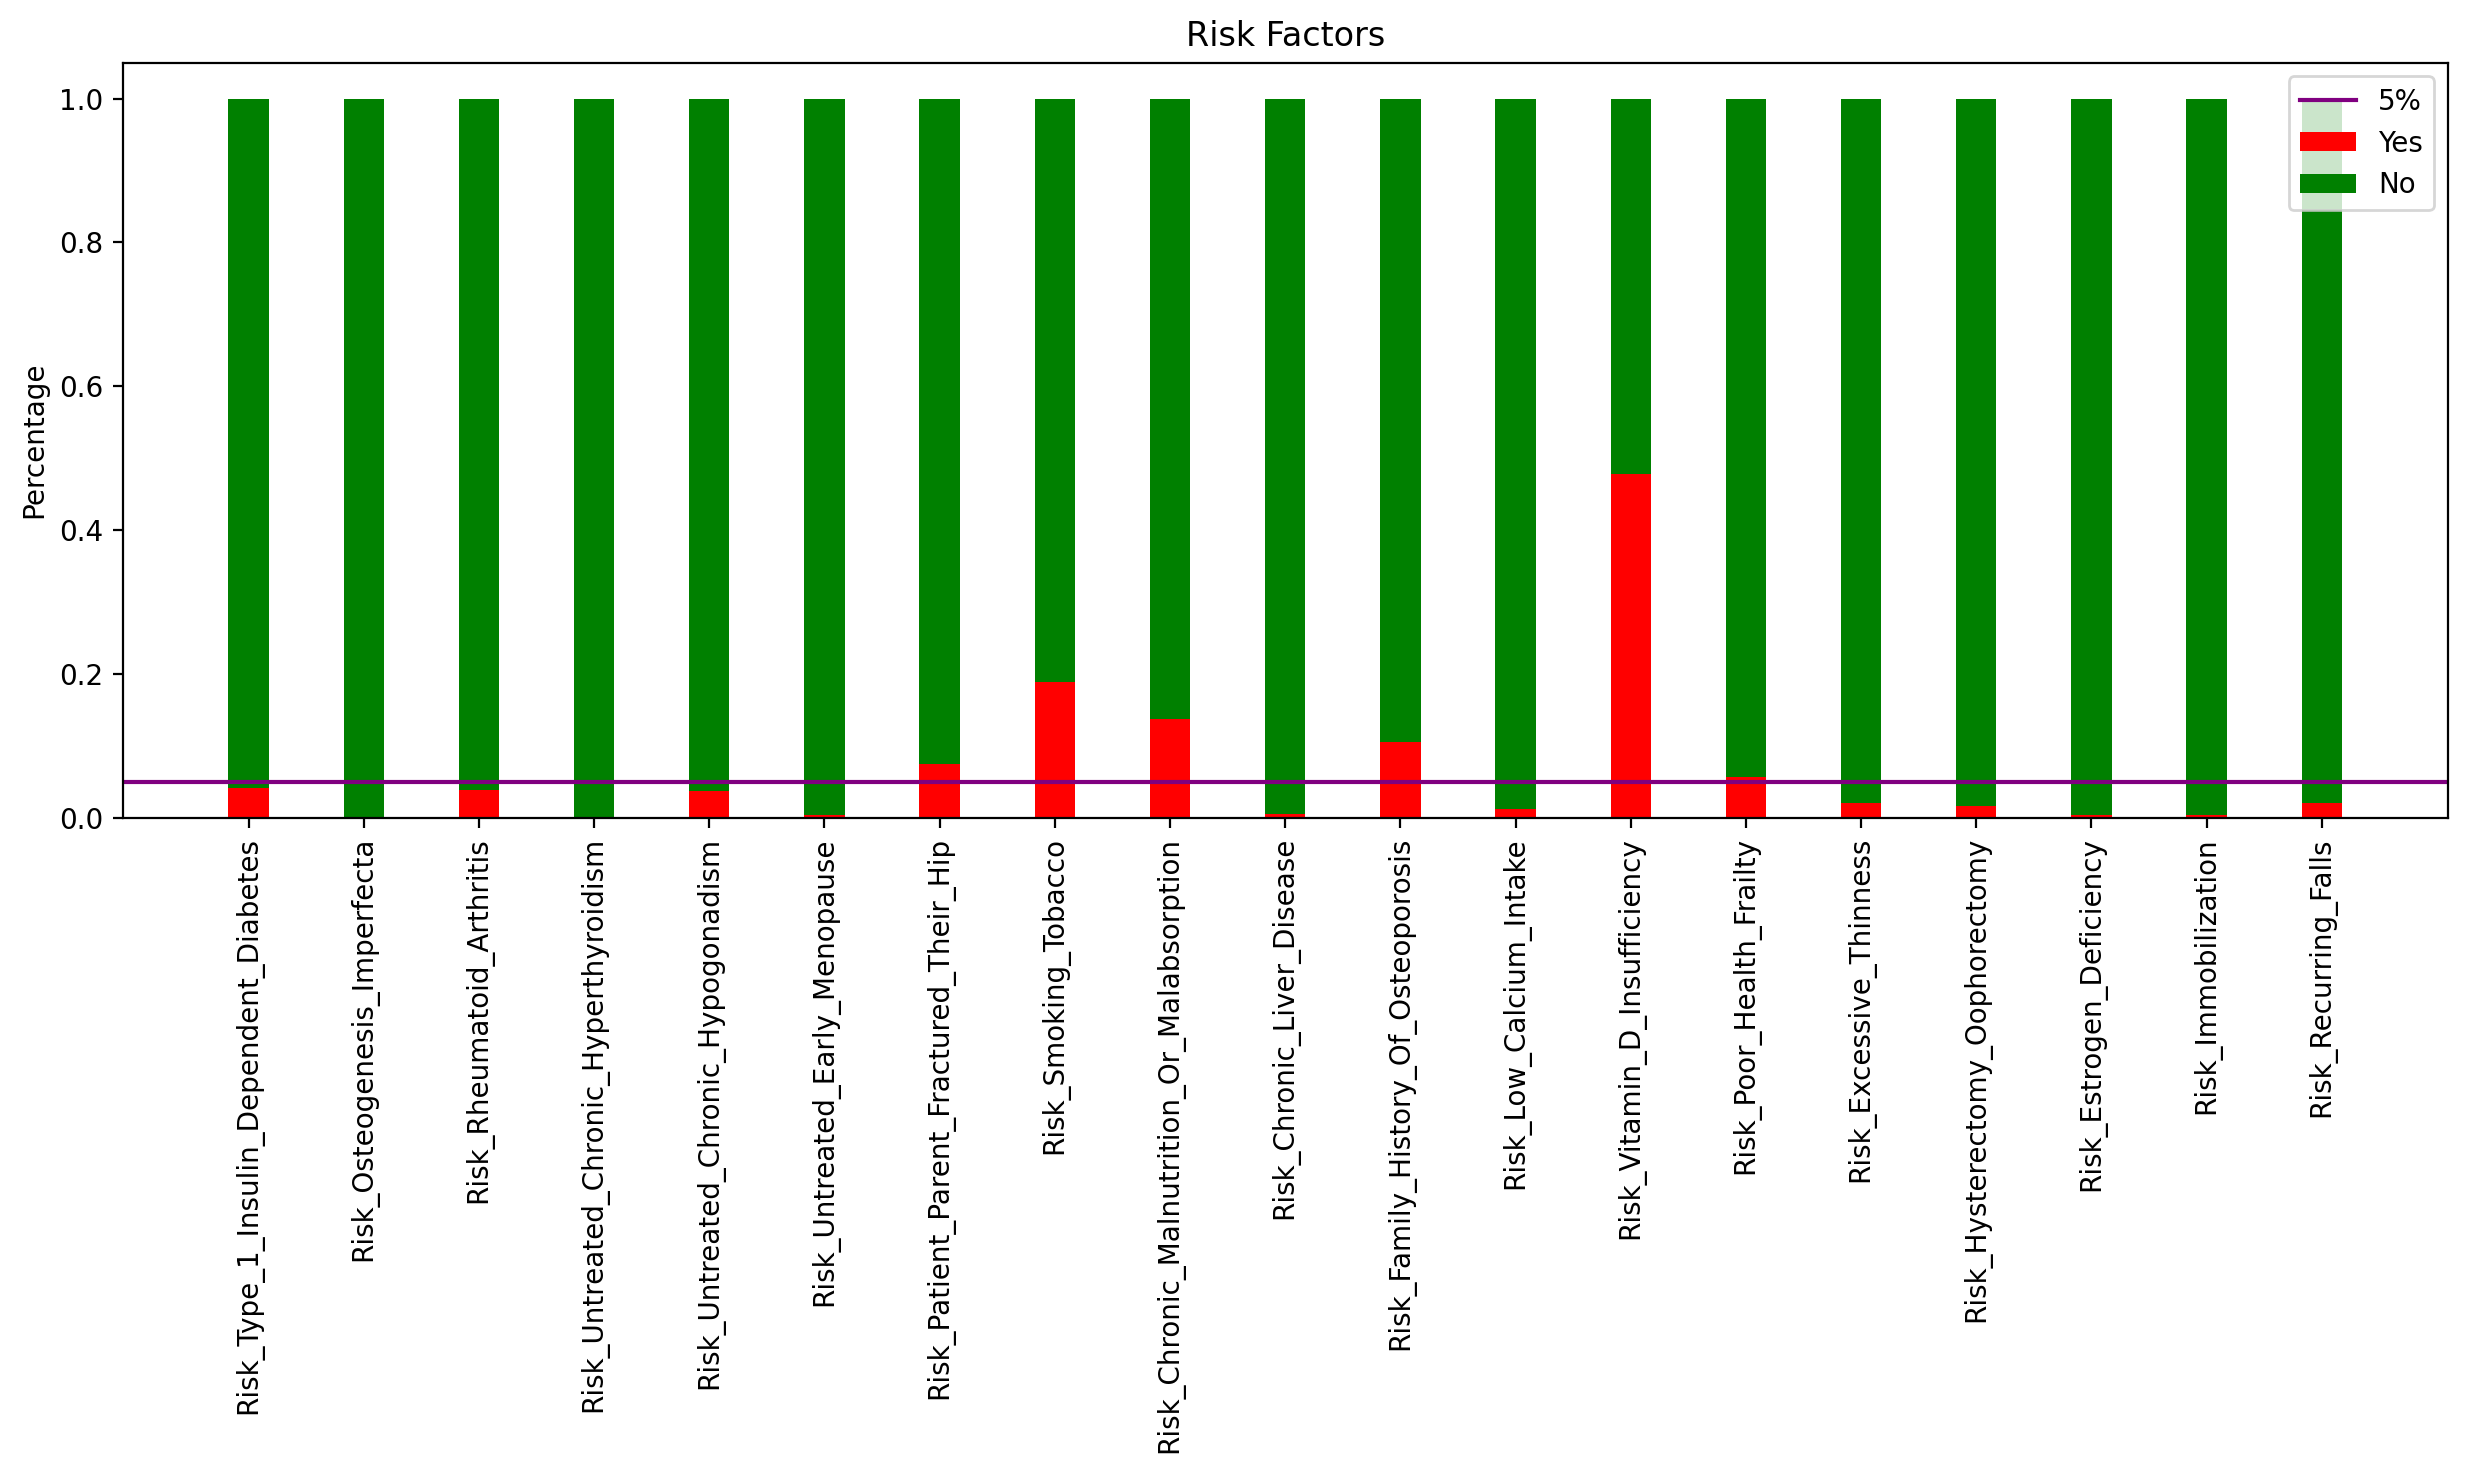

In [45]:

labels = [c for c in data.iloc[:,47:67 ].columns if "Risk_" in c]

yes = []
no = []
width = 0.35 
for l in labels:
    percantages = data[l].value_counts(ascending=True)/ len(data)
    yes.append(percantages['Y'])
    no.append(percantages['N'])

fig, ax = plt.subplots(figsize=(15,5), dpi=200)
ax.bar(labels, yes, width, label='Yes', color='Red')
ax.bar(labels, no, width, bottom=yes, label='No', color='Green')
ax.axhline(y=0.05, color='purple', label='5%')
ax.set_ylabel('Percentage')
ax.set_title('Risk Factors')
ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
plt.show()

# Handling Unknown values for Race, Region, and Ethnicity Variables...

In [46]:
# Apply changes on copy of data
data1 = data.copy()

In [47]:
data['Race'].value_counts()

Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64

In [48]:
# Replace "Other/Unknown" values by Mode, that is Caucasian
data1['Race'] = np.where((data['Race'].isin(['Other/Unknown'])), 'Caucasian', data['Race'])
data1['Race'].value_counts()

Caucasian           3245
African American      95
Asian                 84
Name: Race, dtype: int64

In [49]:
data['Region'].value_counts()

Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64

In [50]:
data['Ethnicity'].value_counts()

Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64

In [51]:
print(" What Ethincity are people with Region Unknown? \n")
print(data.iloc[np.where((data['Region'].isin(['Other/Unknown'])))[0]]['Ethnicity'].value_counts())
print("\n\n Which Race are people with Region Unknown?\n\n")
print(data.iloc[np.where((data['Region'].isin(['Other/Unknown'])))[0]]['Race'].value_counts())
print("\n \n Which Region are people with Not Hispanic Ethnicity?\n\n")
print(data.iloc[np.where((data['Ethnicity'].isin(['Not Hispanic'])))[0]]['Region'].value_counts())


print("\n\n\n  Because most of the people with Unknown Region have Not Hispanic Ethnicity,")
print("  And Most of people with Not Hispanic Ethnicity, have Midwest Region,")
print("  We will replace Unknown Regions with Midwest.")


data1['Region'] = np.where((data['Region'].isin(['Other/Unknown'])), 'Midwest', data['Region'])
data1['Region'].value_counts()

 What Ethincity are people with Region Unknown? 

Not Hispanic    58
Unknown          1
Hispanic         1
Name: Ethnicity, dtype: int64


 Which Race are people with Region Unknown?


Caucasian           52
African American     4
Other/Unknown        2
Asian                2
Name: Race, dtype: int64

 
 Which Region are people with Not Hispanic Ethnicity?


Midwest          1349
South            1153
West              462
Northeast         213
Other/Unknown      58
Name: Region, dtype: int64



  Because most of the people with Unknown Region have Not Hispanic Ethnicity,
  And Most of people with Not Hispanic Ethnicity, have Midwest Region,
  We will replace Unknown Regions with Midwest.


Midwest      1443
South        1247
West          502
Northeast     232
Name: Region, dtype: int64

In [52]:
# Replace "Unknown" values by Mode, that is Not Hispanic
data1['Ethnicity'] = np.where((data['Ethnicity'].isin(['Unknown'])), 'Not Hispanic', data['Ethnicity'])
data1['Ethnicity'].value_counts()


# Or use rare label approach???????????????

Not Hispanic    3326
Hispanic          98
Name: Ethnicity, dtype: int64

# Handling Rare Labels

In [53]:
print("Finding categories less than 5 percent in each variable....")
print("We will merging those categories into one or drop them...")
total_size = len(data1)
to_combine = {}
to_drop = []
percent = 0.05
for col in obejct_cols:
    temp_df = pd.Series(data1[col].value_counts() / total_size)
    good_enough = np.where(temp_df>percent)[0]
    not_enough = np.where(temp_df<percent)[0]
    # Variables with more than 2 categories and has rare categories
    if (data1[col].unique().size > 2) and (not_enough.size > 0):
        to_combine[col] = {"n.e": temp_df[not_enough].index, 'g.e': temp_df[good_enough].index, 'last_g.e': temp_df[good_enough].index[-1]}
    # Variables with exactly 2 categories and has rare categories
    if (data1[col].unique().size == 2) and (not_enough.size > 0):
        to_drop.append(col) 

Finding categories less than 5 percent in each variable....
We will merging those categories into one or drop them...


Ploting categories less than 5 percent....
We will merging those categories into one...
Caucasian           3245
African American      95
Asian                 84
Name: Race, dtype: int64
########################


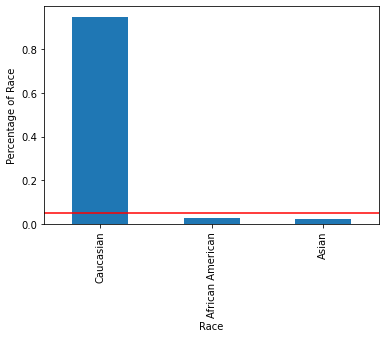

>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64
########################


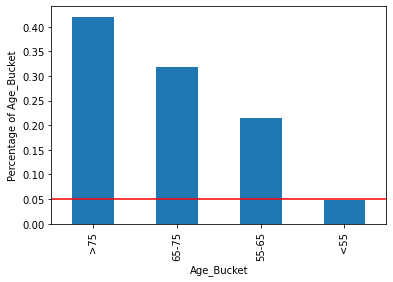

GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
HEMATOLOGY & ONCOLOGY                                               14
OTOLARYNGOLOGY                                                      14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                                11
PULMON

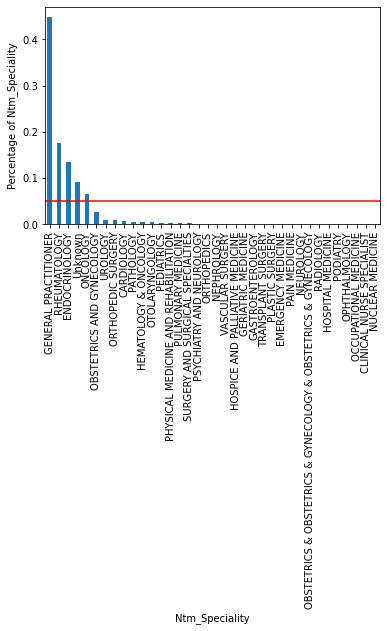

No change    1660
Unknown      1497
Worsened      173
Improved       94
Name: Change_T_Score, dtype: int64
########################


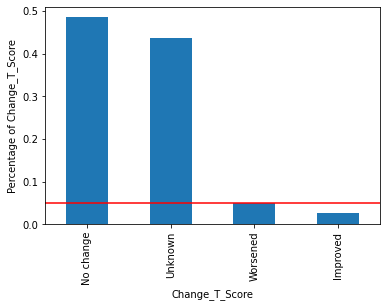

Unknown      2229
No change    1052
Worsened      121
Improved       22
Name: Change_Risk_Segment, dtype: int64
########################


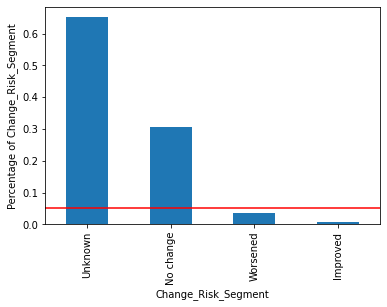

0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
30        7
17        7
28        7
21        7
36        5
19        3
42        3
32        3
34        3
52        2
48        2
58        2
25        2
39        2
88        2
54        1
146       1
50        1
35        1
44        1
108       1
72        1
40        1
68        1
45        1
38        1
69        1
118       1
66        1
110       1
33        1
23        1
27        1
81        1
37        1
29        1
Name: Dexa_Freq_During_Rx, dtype: int64
########################


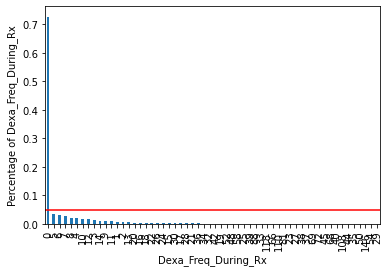

1    1242
0     970
2     781
3     317
4      91
5      15
6       6
7       2
Name: Count_Of_Risks, dtype: int64
########################


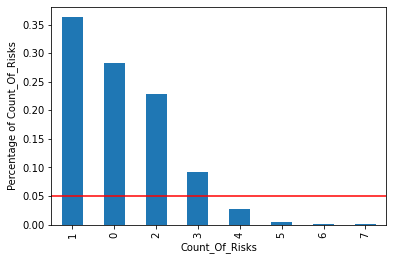

In [54]:
print("Ploting categories less than 5 percent....")
print("We will merging those categories into one...")

total_size = len(data1)
for col in list(to_combine.keys()) + list(int_cols):
    # aka percentage of each col per category

    temp_df = pd.Series(data1[col].value_counts() / total_size)

    # make plot with the above percentages
    print(data1[col].value_counts())
    print("########################")
#     print(data1[data1[col].isin(to_combine[col]['n.e'])]['Persistency_Flag'].value_counts())
#     print("########################")
#     print(data1[data1[col].isin([to_combine[col]['last_g.e']])]['Persistency_Flag'].value_counts())
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of {0}'.format(col))
    plt.show()

In [55]:
# For those 2 integer variables:
to_drop.append('Dexa_Freq_During_Rx')
to_combine['Count_Of_Risks'] = {"n.e": [4,5,6,7], 'g.e': [1,0,2,3], 'last_g.e': 3}

In [56]:
# Combine values in Race = n.e values  into a dummy value
data1['Race'] = np.where((data1['Race'].isin(to_combine['Race']['n.e'])), 'Dummy', data1['Race'])
# # Combine values in Ethnicity = n.e values  into a dummy value
# data1['Ethnicity'] = np.where((data1['Ethnicity'].isin(to_combine['Ethnicity']['n.e'])), 'Dummy', data1['Ethnicity'])
# # Drop rows with Region = n.e values
# data1 = data1[~data1['Region'].isin(to_combine['Region']['n.e'])]
# Combine values in Age_Bucket = n.e + last_g.e values  into a dummy value
age_bucket_comb = list(to_combine['Age_Bucket']['n.e']) + [to_combine['Age_Bucket']['last_g.e']]
data1['Age_Bucket'] = np.where((data1['Age_Bucket'].isin(age_bucket_comb)), '<65', data1['Age_Bucket'])
# Combine values in Ntm_Speciality = n.e values  into a dummy value
data1['Ntm_Speciality'] = np.where((data1['Ntm_Speciality'].isin(to_combine['Ntm_Speciality']['n.e'])), 'Dummy', data1['Ntm_Speciality'])
# Combine values in Change_T_Score = n.e + last_g.e values  into a dummy value
age_bucket_comb = list(to_combine['Change_T_Score']['n.e']) + [to_combine['Change_T_Score']['last_g.e']]
data1['Change_T_Score'] = np.where((data1['Change_T_Score'].isin(age_bucket_comb)), 'Dummy', data1['Change_T_Score'])
# Combine values in Change_Risk_Segment = n.e values  into a dummy value
data1['Change_Risk_Segment'] = np.where((data1['Change_Risk_Segment'].isin(to_combine['Change_Risk_Segment']['n.e'])), 'Dummy', data1['Change_Risk_Segment'])
# Split values in to two buckets, under 3 and about 4
data1['Count_Of_Risks'] = np.where((data1['Count_Of_Risks'].isin(to_combine['Count_Of_Risks']['n.e'])), '1', '0')

data1 = data1.drop(to_drop, axis=1)

Ploting categories less than 5 percent....
We will merging those categories into one...
Caucasian    3245
Dummy         179
Name: Race, dtype: int64


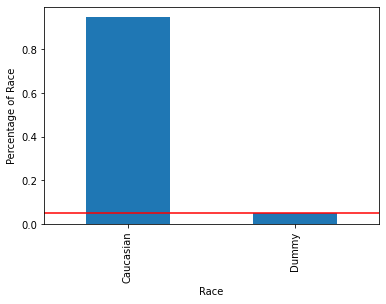

>75      1439
65-75    1086
<65       899
Name: Age_Bucket, dtype: int64


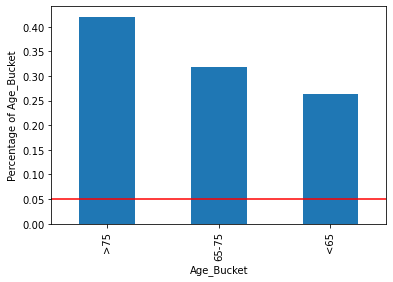

GENERAL PRACTITIONER    1535
RHEUMATOLOGY             604
ENDOCRINOLOGY            458
Unknown                  310
Dummy                    292
ONCOLOGY                 225
Name: Ntm_Speciality, dtype: int64


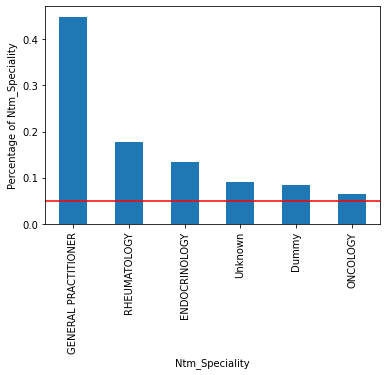

No change    1660
Unknown      1497
Dummy         267
Name: Change_T_Score, dtype: int64


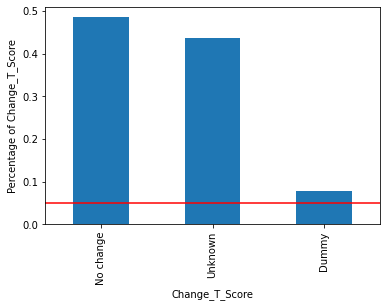

Unknown      2229
No change    1052
Dummy         143
Name: Change_Risk_Segment, dtype: int64


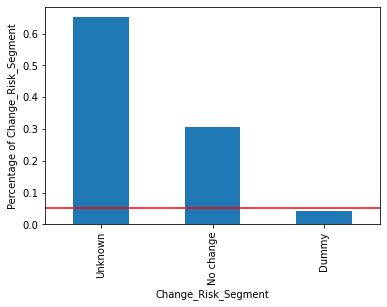

0    3310
1     114
Name: Count_Of_Risks, dtype: int64


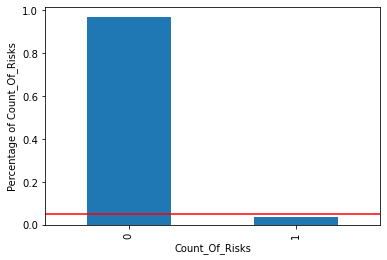

In [57]:
print("Ploting categories less than 5 percent....")
print("We will merging those categories into one...")

total_size = len(data1)
for col in list(to_combine.keys()):# + to_drop:
    # aka percentage of each col per category

    temp_df = pd.Series(data1[col].value_counts() / total_size)

    # make plot with the above percentages
    print(data1[col].value_counts())
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of {0}'.format(col))
    plt.show()

# One hot encoding....

In [58]:
cols = list(obejct_cols) + ['Count_Of_Risks']
ohe = ce.one_hot.OneHotEncoder(verbose=1, cols=cols, return_df=True, use_cat_names=True)
data2 = ohe.fit_transform(data)
data2 = data2.replace({'Persistency_Flag': {'Persistent': 1, 'Non-Persistent': 0}})


In [59]:
for f in data2.columns:
    if any(x in f for x in set(('[', ']', '<'))):
        f_new = f
        for c in set(('[', ']', '<')):
            f_new = f_new.replace(c, "")
        data2.rename(columns={f: f_new}, inplace=True)
        


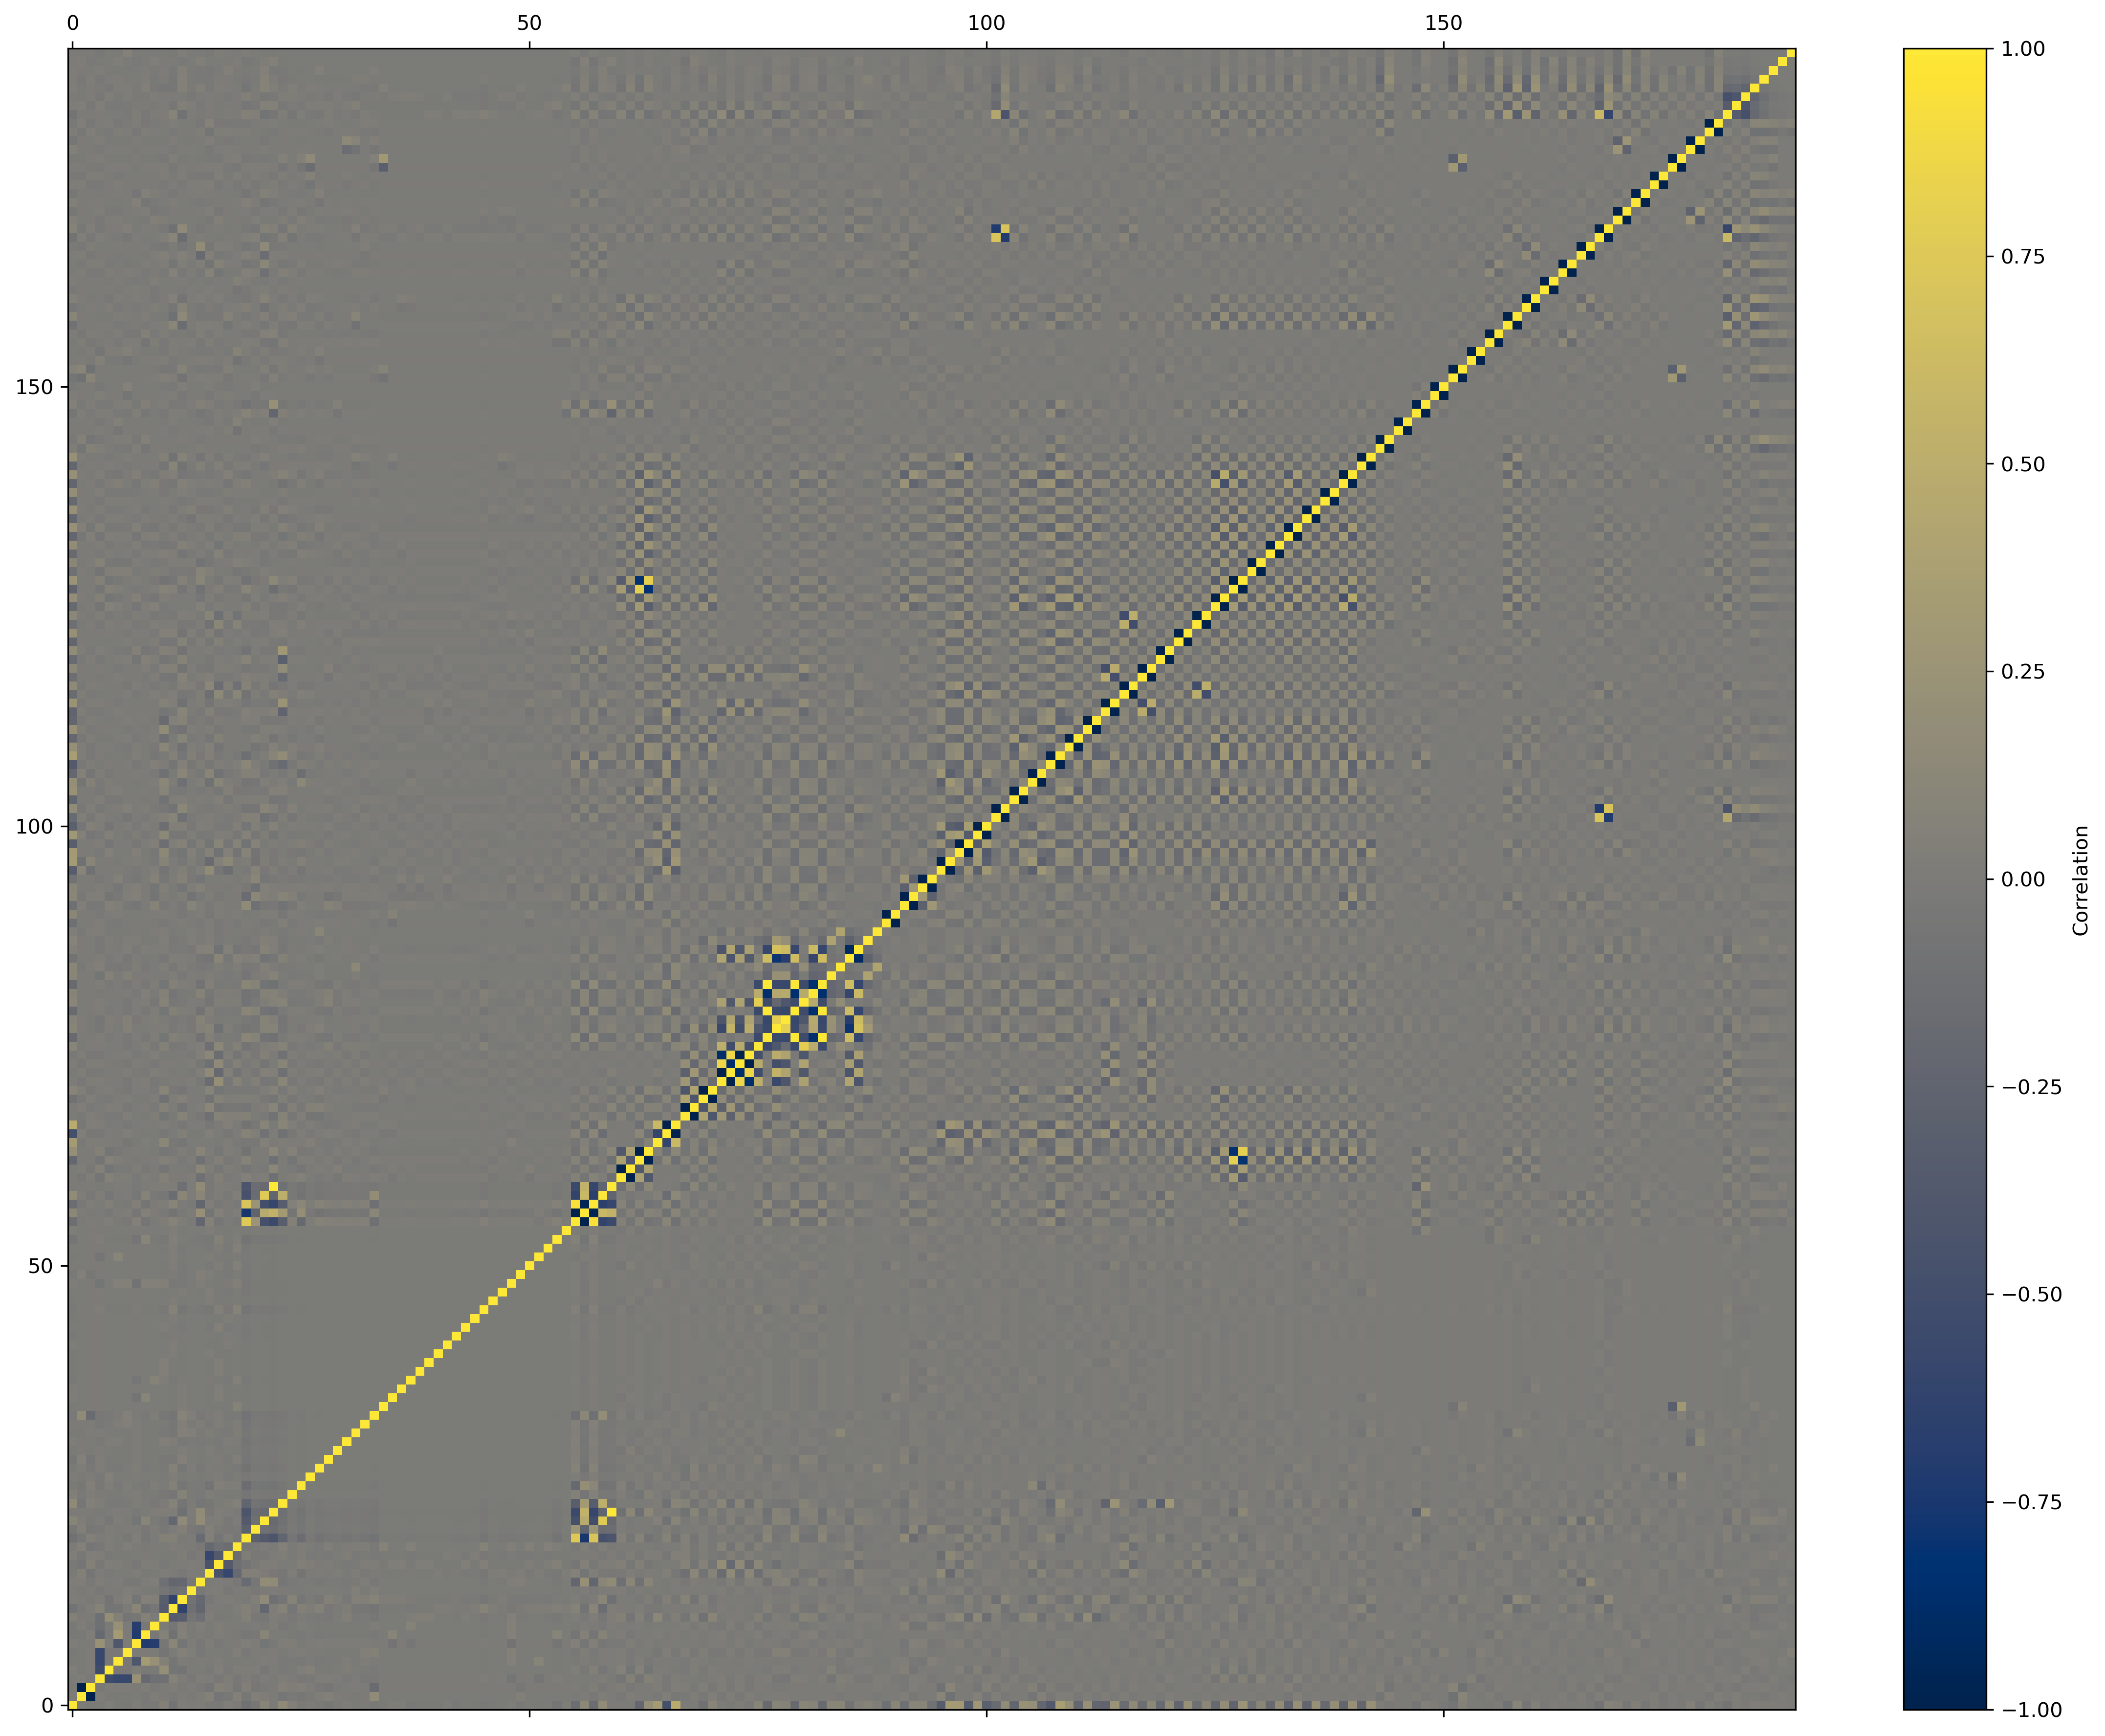

In [60]:
fig, ax = plt.subplots(1,figsize=(19, 15))
fig.dpi = 300
cb = ax.matshow(data2.corr(), aspect='auto', origin="lower", cmap=plt.cm.cividis)
cbar = plt.colorbar(cb)
cbar.ax.set_ylabel("Correlation")
# plt.xlabel(range(data2.shape[1]+20))
# plt.ylabel(range(data2.shape[1]+20))
plt.show()

In [61]:
from featuretools.selection import remove_highly_correlated_features

data3 = remove_highly_correlated_features(feature_matrix=data2, features_to_keep=['Persistency_Flag'], pct_corr_threshold=0.98)

removed_features = [c for c in data2.columns if c not in data3.columns]
print("These features are removed: ")
print(removed_features)

These features are removed: 
['Gender_Female', 'Ntm_Specialist_Flag_Specialist', 'Ntm_Speciality_Bucket_Rheum', 'Gluco_Record_Prior_Ntm_Y', 'Gluco_Record_During_Rx_Y', 'Dexa_During_Rx_Y', 'Frag_Frac_Prior_Ntm_Y', 'Frag_Frac_During_Rx_Y', 'Risk_Segment_Prior_Ntm_HR_VHR', 'Tscore_Bucket_Prior_Ntm_=-2.5', 'Tscore_Bucket_During_Rx_Unknown', 'Change_T_Score_Unknown', 'Adherent_Flag_Non-Adherent', 'Idn_Indicator_Y', 'Injectable_Experience_During_Rx_N', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y', 'Comorb_Encounter_For_Immunization_N', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N', 'Comorb_Vitamin_D_Deficiency_Y', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_N', 'Comorb_Long_Term_Current_Drug_Therapy_Y', 'Comorb_Dorsalgia_N', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions_N', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure_Y', 'Comorb_Disorders_of_lipoprotein_

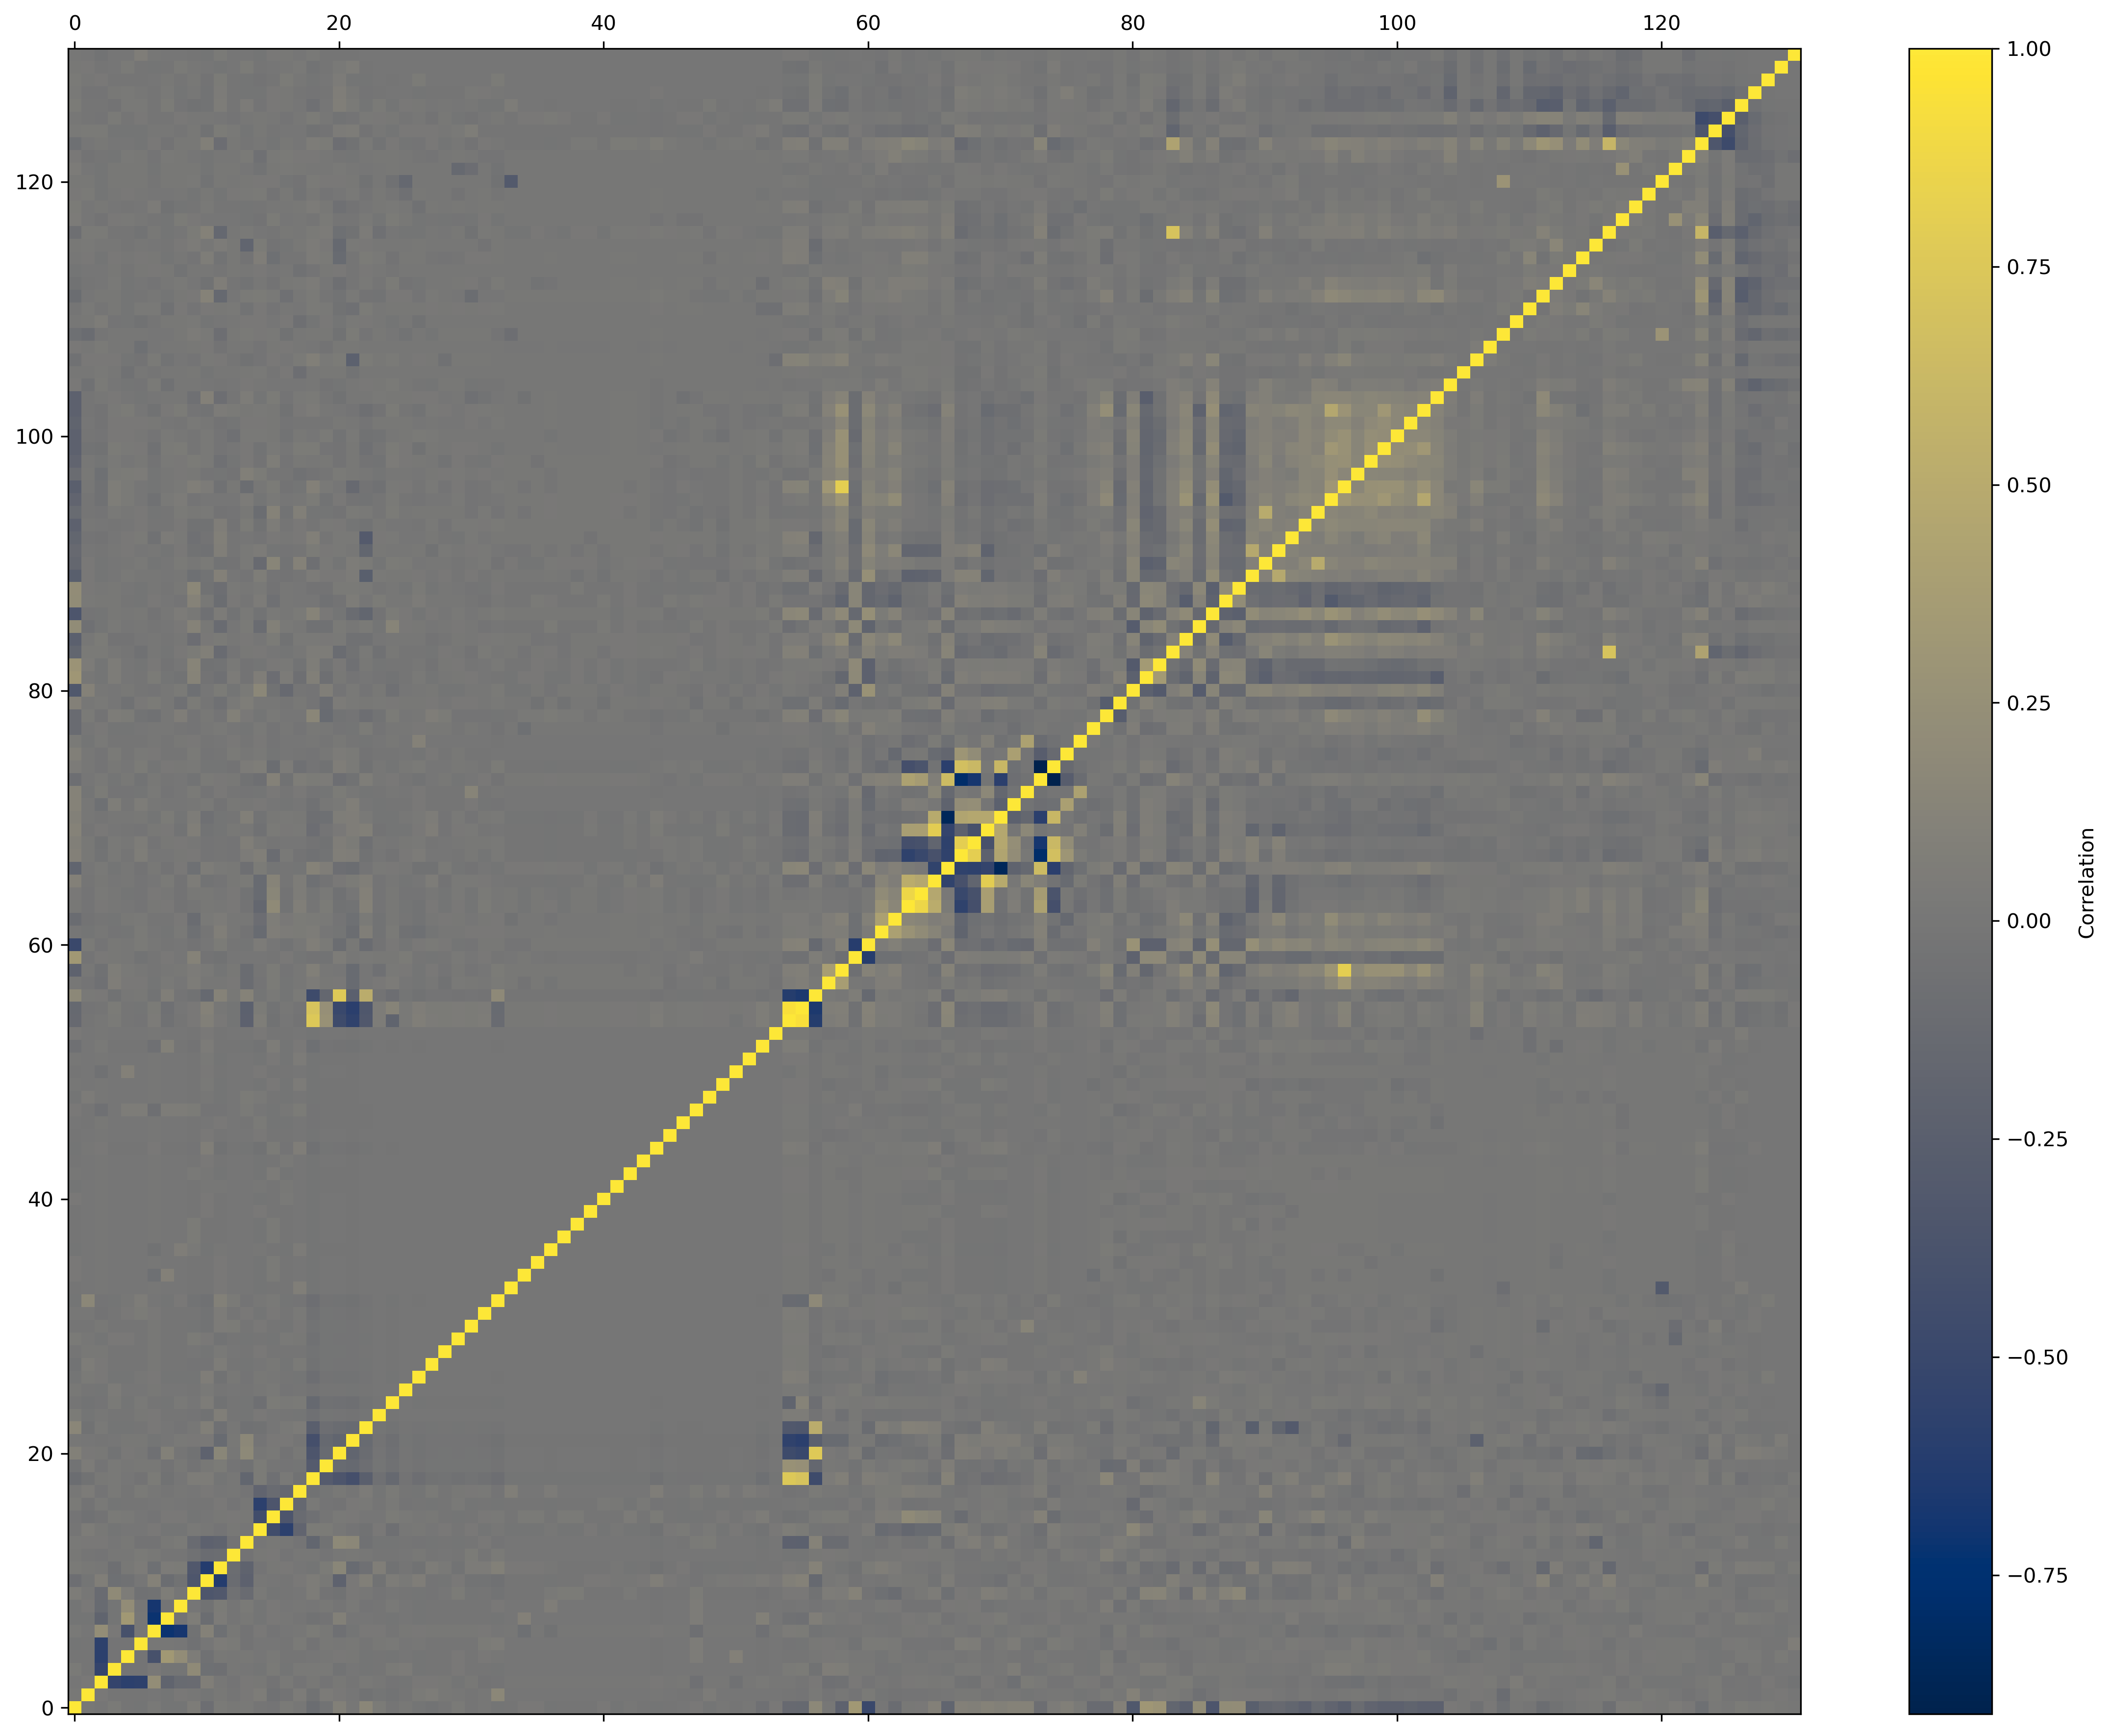

In [62]:
fig, ax = plt.subplots(1,figsize=(19, 15))
fig.dpi = 300
cb = ax.matshow(data3.corr(), aspect='auto', origin="lower", cmap=plt.cm.cividis)
cbar = plt.colorbar(cb)
cbar.ax.set_ylabel("Correlation")
# plt.xlabel(range(data2.shape[1]+20))
# plt.ylabel(range(data2.shape[1]+20))
plt.show()

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, auc
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
import xgboost as xgb


X_train, X_test, y_train, y_test = train_test_split(data3.iloc[:, 1:], data3.iloc[:, 0], test_size=0.25, random_state=48)

# kpca = KernelPCA(n_components = 12, kernel = 'linear')
# X_train = kpca.fit_transform(X_train)
# X_test = kpca.transform(X_test)


# explained_variance = np.var(X_train1, axis=0)
# explained_variance_ratio = explained_variance / np.sum(explained_variance)
# aaa = np.cumsum(explained_variance_ratio)
# plt.plot(np.arange(len(aaa)), aaa)
# aaa.shape

C:\Users\Atlas\anaconda3\envs\torchenv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Accuracy GradientBoostingClassifier:  0.83


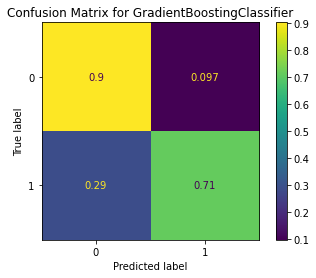

Accuracy RandomForestClassifier:  0.81


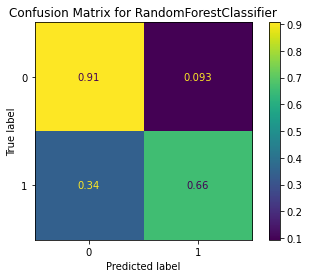

Accuracy LogisticRegression:  0.81


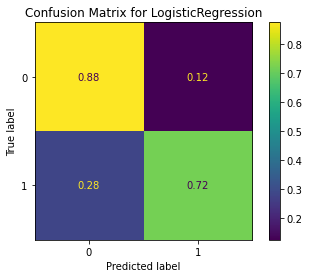

Accuracy SVC RBF:  0.79


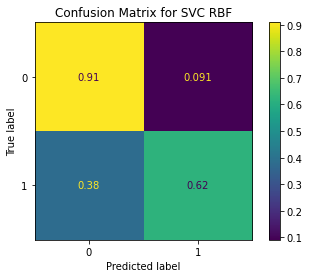

Accuracy SVC linear:  0.81


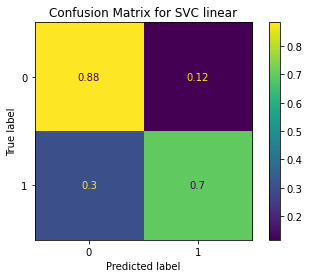

Accuracy SVC polynomial:  0.77


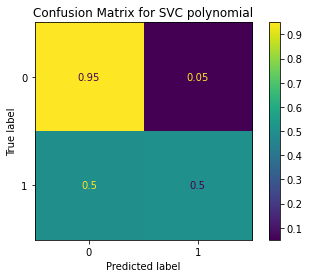

Accuracy SVC sigmoid:  0.74


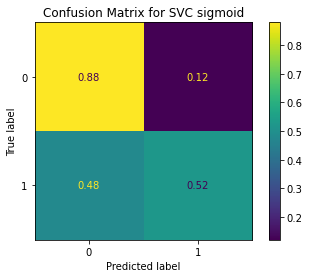

C:\Users\Atlas\anaconda3\envs\torchenv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Accuracy XGBClassifier:  0.76


C:\Users\Atlas\anaconda3\envs\torchenv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


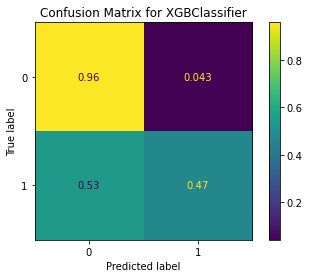

In [64]:

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.7,max_depth=1, random_state=20).fit(X_train, y_train)
y_  = clf.predict(X_test)
print("Accuracy GradientBoostingClassifier: ", round(accuracy_score(y_test, y_),2))
Probs = clf.predict_proba(X_test)[:,1]
fpr_GBC, tpr_GBC, threshold = roc_curve(y_test, Probs)
roc_auc_GBC = auc(fpr_GBC, tpr_GBC)
ConfusionMatrixDisplay.from_predictions(y_test, y_, normalize='true')
plt.title('Confusion Matrix for GradientBoostingClassifier')
plt.show()


clf = RandomForestClassifier(max_depth=12, random_state=20)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy RandomForestClassifier: ', round(accuracy_score(y_test, y_), 2))
Probs = clf.predict_proba(X_test)[:,1]
fpr_RFC, tpr_RFC, threshold = roc_curve(y_test, Probs)
roc_auc_RFC = auc(fpr_RFC, tpr_RFC)
ConfusionMatrixDisplay.from_predictions(y_test, y_, normalize='true')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


logreg = LogisticRegression(max_iter=10000, solver='saga')
logreg.fit(X_train,y_train)
y_ = logreg.predict(X_test)
print('Accuracy LogisticRegression: ', round(accuracy_score(y_test, y_), 2))
Probs = clf.predict_proba(X_test)[:,1]
fpr_LRC, tpr_LRC, threshold = roc_curve(y_test, Probs)
roc_auc_LRC = auc(fpr_LRC, tpr_LRC)
ConfusionMatrixDisplay.from_predictions(y_test, y_, normalize='true')
plt.title('Confusion Matrix for LogisticRegression')
plt.show()


clf = svm.SVC(kernel='rbf', probability=True, random_state=20)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC RBF: ', round(accuracy_score(y_test, y_), 2))
Probs = clf.predict_proba(X_test)[:,1]
fpr_RBF, tpr_RBF, threshold = roc_curve(y_test, Probs)
roc_auc_RBF = auc(fpr_RBF, tpr_RBF)
ConfusionMatrixDisplay.from_predictions(y_test, y_, normalize='true')
plt.title('Confusion Matrix for SVC RBF')
plt.show()


clf = svm.SVC(kernel='linear', probability=True, random_state=20)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC linear: ', round(accuracy_score(y_test, y_), 2))
Probs = clf.predict_proba(X_test)[:,1]
fpr_LIN, tpr_LIN, threshold = roc_curve(y_test, Probs)
roc_auc_LIN = auc(fpr_LIN, tpr_LIN)
ConfusionMatrixDisplay.from_predictions(y_test, y_, normalize='true')
plt.title('Confusion Matrix for SVC linear')
plt.show()



clf = svm.SVC(kernel='poly', probability=True, random_state=20)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC polynomial: ', round(accuracy_score(y_test, y_), 2))
Probs = clf.predict_proba(X_test)[:,1]
fpr_POL, tpr_POL, threshold = roc_curve(y_test, Probs)
roc_auc_POL = auc(fpr_POL, tpr_POL)
ConfusionMatrixDisplay.from_predictions(y_test, y_, normalize='true')
plt.title('Confusion Matrix for SVC polynomial')
plt.show()


clf = svm.SVC(kernel='sigmoid', probability=True, random_state=20)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC sigmoid: ', round(accuracy_score(y_test, y_), 2))
Probs = clf.predict_proba(X_test)[:,1]
fpr_SIG, tpr_SIG, threshold = roc_curve(y_test, Probs)
roc_auc_SIG = auc(fpr_SIG, tpr_SIG)
ConfusionMatrixDisplay.from_predictions(y_test, y_, normalize='true')
plt.title('Confusion Matrix for SVC sigmoid')
plt.show()


clf = xgb.XGBClassifier(objective='reg:tweedie', use_label_encoder=False)
clf = clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print("Accuracy XGBClassifier: ", round(accuracy_score(y_test, y_),2))
Probs = clf.predict_proba(X_test)[:,1]
fpr_XGB, tpr_XGB, threshold = roc_curve(y_test, Probs)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)
ConfusionMatrixDisplay.from_predictions(y_test, y_, normalize='true')
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

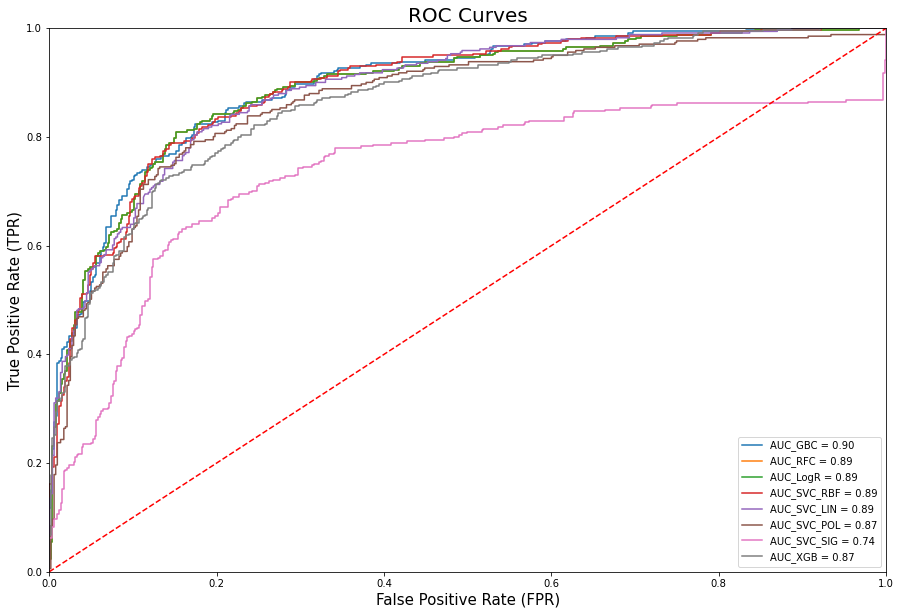

In [65]:



plt.figure(figsize = (15,10))
plt.title('ROC Curves', fontsize = 20)
plt.plot(fpr_GBC, tpr_GBC, label = 'AUC_GBC = %0.2f' % roc_auc_GBC)
plt.plot(fpr_RFC, tpr_RFC, label = 'AUC_RFC = %0.2f' % roc_auc_RFC)
plt.plot(fpr_LRC, tpr_LRC, label = 'AUC_LogR = %0.2f' % roc_auc_LRC)

plt.plot(fpr_RBF, tpr_RBF, label = 'AUC_SVC_RBF = %0.2f' % roc_auc_RBF)
plt.plot(fpr_LIN, tpr_LIN, label = 'AUC_SVC_LIN = %0.2f' % roc_auc_LIN)
plt.plot(fpr_POL, tpr_POL, label = 'AUC_SVC_POL = %0.2f' % roc_auc_POL)

plt.plot(fpr_SIG, tpr_SIG, label = 'AUC_SVC_SIG = %0.2f' % roc_auc_SIG)
plt.plot(fpr_XGB, tpr_XGB, label = 'AUC_XGB = %0.2f' % roc_auc_XGB)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)', fontsize = 15)
plt.xlabel('False Positive Rate (FPR)', fontsize = 15)
plt.show()